In [2541]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
from scipy.stats import levene

In [2542]:
df = pd.read_csv(r'C:\Users\HP\Desktop\DA DS MENTORSHIP PROGRAM\Project Making\Fractal_Merchandise_Analytics\Merch_Analytics.csv')

# New Section

In [2543]:
#Problem Statement
# Retailers face complex challenges in managing merchandise effectively across e-commerce and physical channels. These challenges include:
# 1.	Demand Fluctuations: Predicting customer demand accurately to avoid overstocking or stockouts.
# 2.	Inventory Inefficiency: Ensuring the right inventory is in the right location at the right time.
# 3.	Competitive Pressure: Adapting to real-time market changes and competitor strategies.
# 4.	Customer Personalization: Meeting diverse customer preferences with tailored assortments and experiences.
# 5.	Pricing Complexity: Balancing profitability with pricing strategies, including promotions and markdowns.
# 6.	Operational Inefficiency: Aligning top-down and bottom-up planning while addressing supply chain constraints.
# 7.	Digital Experience: Improving the discoverability of products and resolving friction points in digital platforms.




In [2544]:
df.columns
#Historical_Sales - Whatever sale has been since past years
#Seasonality Trend - What was the trend of the product across the seasons
#Market Trend - A market trend refers to the long-term or overall direction in which a market, industry, or a specific dataset is moving over a period of time.
#Region - Location
#Customer Segment - According to Price Ranges(mid range , low , high)
#Purchase hostory - How many have been bought
#Browsing Time - Time user has spent for searching the product
#Inventory Level -Items left in the stock
#Stocked out 0 Unmet demands
# #Lead Time - Time required to replenish the inventory
# Promotional Discounts: Adjustments made during promotional campaigns.
#Competitor Pricing: Pricing data from competitors for similar products.
#Conversion Rates: Percentage of users purchasing after viewing products.
# Page Bounce Rate: Percentage of users leaving the site without interacting further.
# Gross Margin: The profit margin after deducting the cost of goods sold.
#A sustainability score is a metric used to evaluate and quantify how sustainable an organization, product, or process is based on specific environmental, social,
#and governance (ESG) criteria
#Shipping Cost - Delivering products

Index(['Historical_Sales', 'Seasonality_Trend', 'Market_Trend', 'Region',
       'Customer_Segment', 'Purchase_History', 'Browsing_Time(mins)',
       'Inventory_Level', 'Stock_Out_Rate(%)', 'Lead_Time(Days)',
       'Promotional_Discount(%)', 'Competitor_Price', 'Bounce_Rate(%)',
       'Conversion_Rate(%)', 'Customer_Lifetime_Value($)', 'Gross_Margin(%)',
       'Sustainability_Score', 'Shipping_Cost($)'],
      dtype='object')

In [2545]:
df.rename(columns={'Browsing_Time(mins)':'Browsing_Time' , 'Stock_Out_Rate(%)':'Stock_Out_Rate' ,'Lead_Time(Days)':'Lead_Time'},inplace=True)

In [2546]:
df.rename(columns = {'Promotional_Discount(%)':'Promotional_Discount','Bounce_Rate(%)':'Bounce_Rate','Conversion_Rate(%)':'Conversion_Rate','Customer_Lifetime_Value($)':
                    'Customer_Lifetime_Value','Gross_Margin(%)':'Gross_Margin','Shipping_Cost($)':'Shipping_Cost'},inplace=True)

In [2547]:
df['Browsing_Time'].isnull().sum()

np.int64(42)

In [2548]:
df['Historical_Sales'].cov(df['Browsing_Time'])

np.float64(33.00360960296319)

In [2549]:
df.describe()

,Historical_Sales,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost
count,950.000000,967.000000,958.000000,971.000000,959.000000,977.000000,961.000000,963.000000,953.000000,970.000000,974.000000,989.000000,962.000000,968.000000
mean,592.406316,10.321613,5.038762,268.981462,24.828579,10.181167,38.003042,103.814288,50.331945,5.069352,2601.068450,40.060755,4.967775,27.601420
std,538.868034,5.420895,1.967414,132.338436,14.522088,5.596301,19.182263,53.806899,17.158141,3.177789,1432.227076,17.724407,2.623436,12.851015
min,100.000000,1.000000,-0.799788,50.000000,0.031376,1.000000,5.102662,10.257550,20.011112,0.110761,-371.952579,2.476243,1.000000,5.322850
25%,319.750000,6.000000,3.717093,149.500000,12.333438,5.000000,21.870778,57.825612,36.484175,2.614041,1381.472922,25.581012,3.000000,17.030321
50%,560.000000,11.000000,4.998144,263.000000,25.014526,10.000000,38.568882,105.620141,50.129721,4.963059,2627.240944,39.731585,5.000000,26.966421
75%,791.000000,15.000000,6.419786,383.500000,36.727733,15.000000,54.717124,148.989553,64.929648,7.448083,3836.152418,55.079583,7.000000,38.425743
max,7768.000000,19.000000,10.531959,499.000000,49.992462,19.000000,69.983183,199.904307,79.961896,35.833310,5530.414206,80.330535,9.000000,49.920976


In [2550]:
df.shape

(1000, 18)

In [2551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Historical_Sales         950 non-null    float64
 1   Seasonality_Trend        956 non-null    object 
 2   Market_Trend             962 non-null    object 
 3   Region                   956 non-null    object 
 4   Customer_Segment         974 non-null    object 
 5   Purchase_History         967 non-null    float64
 6   Browsing_Time            958 non-null    float64
 7   Inventory_Level          971 non-null    float64
 8   Stock_Out_Rate           959 non-null    float64
 9   Lead_Time                977 non-null    float64
 10  Promotional_Discount     961 non-null    float64
 11  Competitor_Price         963 non-null    float64
 12  Bounce_Rate              953 non-null    float64
 13  Conversion_Rate          970 non-null    float64
 14  Customer_Lifetime_Value  

In [2552]:
df

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost
0,202.0,Medium,Downward,West,Premium,3.0,5.887003,415.0,22.417324,9.0,24.797399,10.257550,74.567648,5.681654,4489.273360,53.669712,6.0,19.881625
1,535.0,Medium,Upward,North,Premium,16.0,2.696263,275.0,24.461943,6.0,16.442579,104.446969,51.199887,NaN,855.706431,39.152220,1.0,5.673110
2,960.0,Low,Upward,East,Premium,2.0,3.569956,382.0,10.887435,2.0,56.124183,153.033709,67.276455,9.493574,1593.059872,51.599110,8.0,7.477158
3,370.0,Low,Downward,West,Mid-Range,10.0,2.942847,152.0,3.915084,9.0,25.315337,166.421044,33.670591,3.421855,644.792531,26.641372,8.0,17.692711
4,206.0,Low,Downward,South,Premium,6.0,0.503714,155.0,28.671591,17.0,64.438712,177.085429,49.413318,NaN,3501.084055,19.238732,9.0,36.029443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,863.0,Medium,Upward,East,Premium,9.0,3.281534,260.0,5.709189,1.0,NaN,39.126270,21.072412,7.613231,2466.500882,17.804137,5.0,13.719596
996,837.0,Medium,Stable,West,Premium,12.0,4.587751,172.0,25.915936,NaN,65.288606,183.802848,40.083361,NaN,1407.612115,48.871787,9.0,18.659341
997,905.0,Medium,Downward,West,Premium,NaN,6.520644,NaN,29.367390,8.0,9.308862,22.236972,31.032394,1.595801,2263.455802,36.592011,3.0,32.942574
998,405.0,High,Downward,East,Mid-Range,1.0,4.640367,131.0,8.710534,3.0,28.842383,20.457165,60.808571,7.036975,3559.784071,28.310248,4.0,24.172535


In [2553]:
#Cleaning the Data

In [2554]:

mode_value_mt = df['Market_Trend'].mode()[0]


df['Market_Trend'] = df['Market_Trend'].fillna(mode_value_mt)



In [2555]:

mode_value_st = df['Seasonality_Trend'].mode()[0]


df['Seasonality_Trend'] = df['Seasonality_Trend'].fillna(mode_value_st)


In [2556]:
mode_value_st

'High'

In [2557]:

mode_value_region = df['Region'].mode()[0]


df['Region'] = df['Region'].fillna(mode_value_region)

In [2558]:
null_cs = df['Customer_Segment'].isna()

In [2559]:
df[null_cs]

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost
21,408.0,High,Upward,North,NaN,1.0,4.836954,356.0,22.887191,16.0,48.965310,170.459091,36.725348,0.164301,4340.955590,45.111067,1.0,18.914348
43,799.0,High,Upward,West,NaN,9.0,3.902502,469.0,3.088119,2.0,28.125315,113.858873,25.608076,2.637302,4483.240818,27.172207,4.0,43.096157
77,134.0,Low,Stable,South,NaN,1.0,6.945993,396.0,42.946617,2.0,38.977494,122.848718,50.794314,7.082308,641.323474,29.385065,6.0,12.393166
81,NaN,High,Downward,West,NaN,16.0,3.608277,219.0,40.680441,4.0,16.209015,199.790864,63.298913,0.247203,4387.068158,19.280485,1.0,10.033067
92,829.0,Low,Downward,West,NaN,10.0,NaN,108.0,8.637838,2.0,14.198878,160.233552,59.589251,1.369940,1629.997067,74.704800,9.0,44.421760
244,707.0,Low,Stable,South,NaN,NaN,7.447421,142.0,40.961711,13.0,49.215454,25.706737,60.836232,5.545384,2718.882262,59.144172,8.0,43.485527
253,367.0,Low,Upward,West,NaN,7.0,5.676505,276.0,13.311575,12.0,59.375905,37.391885,64.154119,1.134283,4946.575035,8.979938,5.0,18.562927
317,739.0,High,Downward,North,NaN,8.0,6.688566,195.0,8.526902,9.0,34.040039,195.188898,76.870214,0.696182,90.846931,39.369272,8.0,38.894115
407,126.0,Low,Downward,East,NaN,10.0,8.198313,360.0,36.496176,13.0,58.370094,86.438811,76.360101,8.709933,4437.409383,64.682442,9.0,17.480039
449,422.0,High,Stable,East,NaN,18.0,2.051525,406.0,38.363959,8.0,51.214216,198.422898,58.564763,1.767014,669.383282,58.530828,3.0,23.832084


In [2560]:

mode_value_cs = df['Customer_Segment'].mode()[0]


df['Customer_Segment'] = df['Customer_Segment'].fillna(mode_value_cs)

In [2561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Historical_Sales         950 non-null    float64
 1   Seasonality_Trend        1000 non-null   object 
 2   Market_Trend             1000 non-null   object 
 3   Region                   1000 non-null   object 
 4   Customer_Segment         1000 non-null   object 
 5   Purchase_History         967 non-null    float64
 6   Browsing_Time            958 non-null    float64
 7   Inventory_Level          971 non-null    float64
 8   Stock_Out_Rate           959 non-null    float64
 9   Lead_Time                977 non-null    float64
 10  Promotional_Discount     961 non-null    float64
 11  Competitor_Price         963 non-null    float64
 12  Bounce_Rate              953 non-null    float64
 13  Conversion_Rate          970 non-null    float64
 14  Customer_Lifetime_Value  

In [2562]:
df

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost
0,202.0,Medium,Downward,West,Premium,3.0,5.887003,415.0,22.417324,9.0,24.797399,10.257550,74.567648,5.681654,4489.273360,53.669712,6.0,19.881625
1,535.0,Medium,Upward,North,Premium,16.0,2.696263,275.0,24.461943,6.0,16.442579,104.446969,51.199887,NaN,855.706431,39.152220,1.0,5.673110
2,960.0,Low,Upward,East,Premium,2.0,3.569956,382.0,10.887435,2.0,56.124183,153.033709,67.276455,9.493574,1593.059872,51.599110,8.0,7.477158
3,370.0,Low,Downward,West,Mid-Range,10.0,2.942847,152.0,3.915084,9.0,25.315337,166.421044,33.670591,3.421855,644.792531,26.641372,8.0,17.692711
4,206.0,Low,Downward,South,Premium,6.0,0.503714,155.0,28.671591,17.0,64.438712,177.085429,49.413318,NaN,3501.084055,19.238732,9.0,36.029443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,863.0,Medium,Upward,East,Premium,9.0,3.281534,260.0,5.709189,1.0,NaN,39.126270,21.072412,7.613231,2466.500882,17.804137,5.0,13.719596
996,837.0,Medium,Stable,West,Premium,12.0,4.587751,172.0,25.915936,NaN,65.288606,183.802848,40.083361,NaN,1407.612115,48.871787,9.0,18.659341
997,905.0,Medium,Downward,West,Premium,NaN,6.520644,NaN,29.367390,8.0,9.308862,22.236972,31.032394,1.595801,2263.455802,36.592011,3.0,32.942574
998,405.0,High,Downward,East,Mid-Range,1.0,4.640367,131.0,8.710534,3.0,28.842383,20.457165,60.808571,7.036975,3559.784071,28.310248,4.0,24.172535


In [2563]:
#Checking whether if all the columns have null value
null_col = df[df.isnull().all(axis=1)]


In [2564]:
#No such value found
null_col

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost


Text(0.5, 1.0, 'Historical_Sales Skewness')

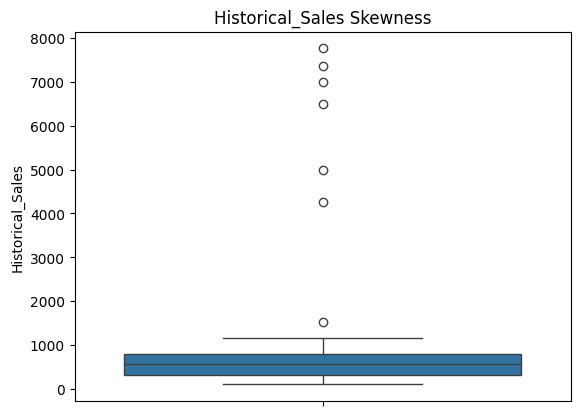

In [2565]:
#Lets check if data is skewed
sns.boxplot(data=df['Historical_Sales'])
plt.title('Historical_Sales Skewness')

In [2566]:
d =df['Historical_Sales']>1500

In [2567]:
print(df['Historical_Sales'].isnull().sum())



50


In [2568]:
df[d].shape #7 oultiers

(7, 18)

In [2569]:
df['Historical_Sales'].median()

np.float64(560.0)

In [2570]:
df['Seasonality_Trend'].mode()

0    High
Name: Seasonality_Trend, dtype: object

In [2571]:
df['Market_Trend'].mode()

0    Upward
Name: Market_Trend, dtype: object

In [2572]:
df['Region'].mode()

0    West
Name: Region, dtype: object

In [2573]:
df['Customer_Segment'].mode()

0    Budget
Name: Customer_Segment, dtype: object

In [2574]:
#Calculate median or mean according to seasonality_trend , amrket_trend , region , Customer_Segment

In [2575]:
r=df.groupby(['Seasonality_Trend','Market_Trend','Customer_Segment','Region'])['Historical_Sales'].median()
r

Seasonality_Trend  Market_Trend  Customer_Segment  Region
High               Downward      Budget            East      752.0
                                                   North     503.0
                                                   South     549.0
                                                   West      427.5
                                 Mid-Range         East      652.0
                                                             ...  
Medium             Upward        Mid-Range         West      704.5
                                 Premium           East      712.0
                                                   North     548.0
                                                   South     753.0
                                                   West      546.0
Name: Historical_Sales, Length: 108, dtype: float64

In [2576]:


df = df.merge(r,on = ['Seasonality_Trend','Market_Trend','Customer_Segment','Region'] ,how = 'left',suffixes = ('','_r'))



In [2577]:
df['Historical_Sales'] = df['Historical_Sales'].fillna(df['Historical_Sales_r'])


In [2578]:
df = df.drop(columns = 'Historical_Sales_r' )

In [2579]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Historical_Sales         1000 non-null   float64
 1   Seasonality_Trend        1000 non-null   object 
 2   Market_Trend             1000 non-null   object 
 3   Region                   1000 non-null   object 
 4   Customer_Segment         1000 non-null   object 
 5   Purchase_History         967 non-null    float64
 6   Browsing_Time            958 non-null    float64
 7   Inventory_Level          971 non-null    float64
 8   Stock_Out_Rate           959 non-null    float64
 9   Lead_Time                977 non-null    float64
 10  Promotional_Discount     961 non-null    float64
 11  Competitor_Price         963 non-null    float64
 12  Bounce_Rate              953 non-null    float64
 13  Conversion_Rate          970 non-null    float64
 14  Customer_Lifetime_Value  

In [2580]:
null_ph=df['Purchase_History'].isna()

In [2581]:
df[null_ph]

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost
45,289.0,Medium,Upward,North,Premium,NaN,3.779954,58.0,26.086671,10.0,54.137780,104.315795,29.734133,2.978840,195.986250,20.036733,5.0,28.644826
47,662.0,Medium,Downward,North,Mid-Range,NaN,3.449932,358.0,39.086449,13.0,12.792722,186.169228,69.978924,4.755856,2820.897281,18.053301,4.0,38.953820
71,191.0,High,Upward,South,Budget,NaN,6.220046,216.0,25.001696,5.0,16.349710,52.004986,50.905063,2.638431,4758.202098,43.070512,7.0,44.770418
112,891.0,Low,Stable,South,Mid-Range,NaN,1.559109,429.0,49.112803,11.0,33.416183,146.271654,NaN,7.522553,2825.661780,50.815794,9.0,42.695178
129,571.0,Medium,Downward,South,Mid-Range,NaN,4.954844,125.0,22.075196,19.0,35.074709,134.890577,27.852580,9.810975,1470.477557,38.354518,3.0,19.133482
134,491.0,Low,Upward,South,Mid-Range,NaN,7.886579,93.0,0.037385,16.0,27.202026,195.710758,70.322271,8.005555,4848.947004,71.473095,8.0,28.083234
214,544.0,Medium,Stable,South,Premium,NaN,4.407908,482.0,40.685514,16.0,34.867647,127.854844,37.603769,2.620632,2813.930014,39.823868,5.0,49.463900
244,707.0,Low,Stable,South,Budget,NaN,7.447421,142.0,40.961711,13.0,49.215454,25.706737,60.836232,5.545384,2718.882262,59.144172,8.0,43.485527
294,297.0,Low,Stable,South,Premium,NaN,4.556623,374.0,23.727218,4.0,51.005959,66.657027,64.896609,4.867241,3998.662765,36.176343,5.0,29.338681
366,572.0,Low,Downward,West,Budget,NaN,7.026912,67.0,5.503688,5.0,6.700292,162.690678,64.256186,1.818251,2716.493167,40.911698,1.0,38.348546


<Axes: ylabel='Purchase_History'>

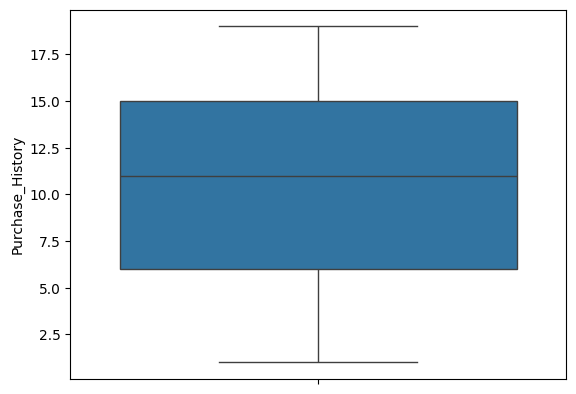

In [2582]:
sns.boxplot( data =df['Purchase_History'])

In [2583]:

skewness=skew(df['Purchase_History'],nan_policy = 'omit')


In [2584]:
print(skewness)
#The data is not significantly skewed so we can fill null values with mean

-0.08821694117436824


In [2585]:
mean_ph = round(df['Purchase_History'].mean())
mean_ph

10

In [2586]:
df['Purchase_History'] = df['Purchase_History'].fillna(mean_ph)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Historical_Sales         1000 non-null   float64
 1   Seasonality_Trend        1000 non-null   object 
 2   Market_Trend             1000 non-null   object 
 3   Region                   1000 non-null   object 
 4   Customer_Segment         1000 non-null   object 
 5   Purchase_History         1000 non-null   float64
 6   Browsing_Time            958 non-null    float64
 7   Inventory_Level          971 non-null    float64
 8   Stock_Out_Rate           959 non-null    float64
 9   Lead_Time                977 non-null    float64
 10  Promotional_Discount     961 non-null    float64
 11  Competitor_Price         963 non-null    float64
 12  Bounce_Rate              953 non-null    float64
 13  Conversion_Rate          970 non-null    float64
 14  Customer_Lifetime_Value  

In [2587]:
df ['Browsing_Time'].isna().sum()

np.int64(42)

<Axes: ylabel='Browsing_Time'>

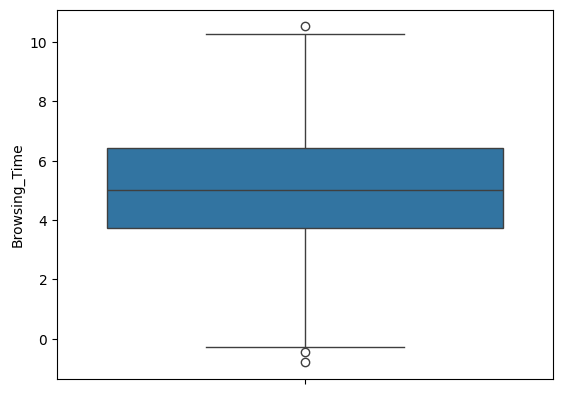

In [2588]:
sns.boxplot(data = df ['Browsing_Time'])

In [2589]:
bt_less_than_zero =df['Browsing_Time']<0

In [2590]:
df[bt_less_than_zero ]

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost
384,603.0,Medium,Upward,West,Premium,6.0,-0.281795,228.0,26.642357,15.0,NaN,126.261776,77.190031,4.062324,2035.656507,64.647092,4.0,27.229320
426,319.0,Medium,Downward,West,Budget,15.0,-0.254131,499.0,24.955433,14.0,18.881875,106.450977,62.140306,8.440332,3370.914948,38.391084,3.0,16.278991
463,402.0,High,Upward,West,Mid-Range,9.0,-0.021670,425.0,0.765529,10.0,30.787294,150.948216,56.512079,7.234612,694.351637,61.345555,5.0,32.329944
608,936.0,Medium,Stable,East,Premium,8.0,-0.444555,187.0,31.471186,1.0,35.393282,186.093275,63.701170,1.286945,4063.577914,40.023541,3.0,30.116367
789,169.0,High,Stable,West,Premium,12.0,-0.799788,86.0,48.963165,3.0,35.574152,74.434855,54.146419,9.810349,3500.353347,50.000894,7.0,20.496510
821,290.0,High,Upward,North,Mid-Range,10.0,-0.176833,91.0,3.000410,1.0,35.756222,50.480897,36.484175,7.649098,3447.798369,19.269208,NaN,21.635905


In [2591]:
print("Original rows:", len(df))
df_filtered = df[df['Browsing_Time'].notnull() & (df['Browsing_Time'] > 0)]
print("Filtered rows:", len(df_filtered))


Original rows: 1000
Filtered rows: 952


In [2592]:
df['Browsing_Time'].isnull().sum()

np.int64(42)

In [2593]:
len(df) - len(df_filtered)

48

<Axes: ylabel='Browsing_Time'>

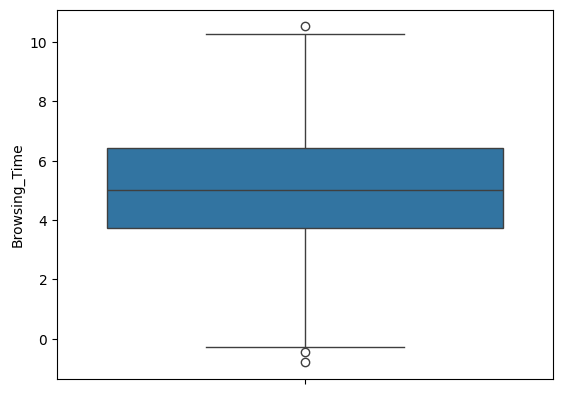

In [2594]:
sns.boxplot(data = df ['Browsing_Time'])

In [2595]:
df['Browsing_Time']

0      5.887003
1      2.696263
2      3.569956
3      2.942847
4      0.503714
         ...   
995    3.281534
996    4.587751
997    6.520644
998    4.640367
999    5.323564
Name: Browsing_Time, Length: 1000, dtype: float64

In [2596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Historical_Sales         1000 non-null   float64
 1   Seasonality_Trend        1000 non-null   object 
 2   Market_Trend             1000 non-null   object 
 3   Region                   1000 non-null   object 
 4   Customer_Segment         1000 non-null   object 
 5   Purchase_History         1000 non-null   float64
 6   Browsing_Time            958 non-null    float64
 7   Inventory_Level          971 non-null    float64
 8   Stock_Out_Rate           959 non-null    float64
 9   Lead_Time                977 non-null    float64
 10  Promotional_Discount     961 non-null    float64
 11  Competitor_Price         963 non-null    float64
 12  Bounce_Rate              953 non-null    float64
 13  Conversion_Rate          970 non-null    float64
 14  Customer_Lifetime_Value  

In [2597]:
zero_bt =df['Browsing_Time']<0

In [2598]:
df[zero_bt ]

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost
384,603.0,Medium,Upward,West,Premium,6.0,-0.281795,228.0,26.642357,15.0,NaN,126.261776,77.190031,4.062324,2035.656507,64.647092,4.0,27.229320
426,319.0,Medium,Downward,West,Budget,15.0,-0.254131,499.0,24.955433,14.0,18.881875,106.450977,62.140306,8.440332,3370.914948,38.391084,3.0,16.278991
463,402.0,High,Upward,West,Mid-Range,9.0,-0.021670,425.0,0.765529,10.0,30.787294,150.948216,56.512079,7.234612,694.351637,61.345555,5.0,32.329944
608,936.0,Medium,Stable,East,Premium,8.0,-0.444555,187.0,31.471186,1.0,35.393282,186.093275,63.701170,1.286945,4063.577914,40.023541,3.0,30.116367
789,169.0,High,Stable,West,Premium,12.0,-0.799788,86.0,48.963165,3.0,35.574152,74.434855,54.146419,9.810349,3500.353347,50.000894,7.0,20.496510
821,290.0,High,Upward,North,Mid-Range,10.0,-0.176833,91.0,3.000410,1.0,35.756222,50.480897,36.484175,7.649098,3447.798369,19.269208,NaN,21.635905


In [2599]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Historical_Sales         1000 non-null   float64
 1   Seasonality_Trend        1000 non-null   object 
 2   Market_Trend             1000 non-null   object 
 3   Region                   1000 non-null   object 
 4   Customer_Segment         1000 non-null   object 
 5   Purchase_History         1000 non-null   float64
 6   Browsing_Time            958 non-null    float64
 7   Inventory_Level          971 non-null    float64
 8   Stock_Out_Rate           959 non-null    float64
 9   Lead_Time                977 non-null    float64
 10  Promotional_Discount     961 non-null    float64
 11  Competitor_Price         963 non-null    float64
 12  Bounce_Rate              953 non-null    float64
 13  Conversion_Rate          970 non-null    float64
 14  Customer_Lifetime_Value  

In [2600]:
print(df[df['Browsing_Time'] <= 0]['Historical_Sales'].notnull().sum())

6


In [2601]:
df  = df[(df['Browsing_Time'] > 0) | (df['Browsing_Time'].isnull())]


In [2602]:
df['Browsing_Time'].isna().sum()

np.int64(42)

In [2603]:
print(df[df['Browsing_Time'] <= 0]['Historical_Sales'].notnull().sum())

0


In [2604]:
print(df[df['Browsing_Time'] <= 0]['Historical_Sales'].notnull().sum())

0


In [2605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Historical_Sales         994 non-null    float64
 1   Seasonality_Trend        994 non-null    object 
 2   Market_Trend             994 non-null    object 
 3   Region                   994 non-null    object 
 4   Customer_Segment         994 non-null    object 
 5   Purchase_History         994 non-null    float64
 6   Browsing_Time            952 non-null    float64
 7   Inventory_Level          965 non-null    float64
 8   Stock_Out_Rate           953 non-null    float64
 9   Lead_Time                971 non-null    float64
 10  Promotional_Discount     956 non-null    float64
 11  Competitor_Price         957 non-null    float64
 12  Bounce_Rate              947 non-null    float64
 13  Conversion_Rate          964 non-null    float64
 14  Customer_Lifetime_Value  968 no

<Axes: ylabel='Browsing_Time'>

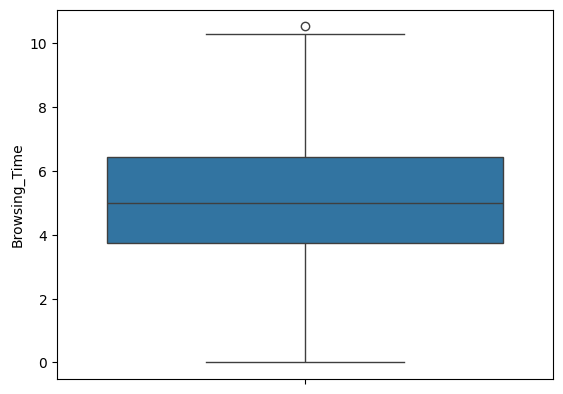

In [2606]:
sns.boxplot(data = df['Browsing_Time'])

In [2607]:
df.loc[df['Browsing_Time']>10]

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost
179,790.0,Medium,Stable,South,Premium,9.0,10.531959,493.0,26.665418,3.0,33.427592,156.601884,44.616148,4.480844,2346.359819,25.792386,3.0,23.201612
216,605.0,Low,Downward,South,Budget,7.0,10.109373,427.0,27.101353,4.0,43.132011,26.424693,65.893170,6.391026,1249.249620,26.916154,8.0,7.981461
395,569.0,High,Stable,South,Budget,8.0,10.290074,461.0,33.632217,14.0,67.472687,28.351850,NaN,8.373357,363.300280,74.890537,4.0,NaN
432,198.0,High,Upward,East,Mid-Range,10.0,10.139814,376.0,4.491106,10.0,29.583441,56.404403,78.534168,0.255157,209.938170,44.026443,7.0,22.371397
883,657.0,Medium,Stable,South,Mid-Range,6.0,10.003290,108.0,20.353839,17.0,32.268391,11.478954,44.881887,0.802911,-118.146700,57.413774,9.0,31.301034


In [2608]:
skewness=skew(df['Browsing_Time'],nan_policy = 'omit')

In [2609]:
print(skewness)

0.13053541069409874


In [2610]:
df['Browsing_Time'].isnull().sum()

np.int64(42)

In [2611]:
median_browsing_time = df['Browsing_Time'].median()  #We can replace null values with median

In [2612]:
df['Browsing_Time'] = df['Browsing_Time'].fillna(median_browsing_time)

In [2613]:
df

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost
0,202.0,Medium,Downward,West,Premium,3.0,5.887003,415.0,22.417324,9.0,24.797399,10.257550,74.567648,5.681654,4489.273360,53.669712,6.0,19.881625
1,535.0,Medium,Upward,North,Premium,16.0,2.696263,275.0,24.461943,6.0,16.442579,104.446969,51.199887,NaN,855.706431,39.152220,1.0,5.673110
2,960.0,Low,Upward,East,Premium,2.0,3.569956,382.0,10.887435,2.0,56.124183,153.033709,67.276455,9.493574,1593.059872,51.599110,8.0,7.477158
3,370.0,Low,Downward,West,Mid-Range,10.0,2.942847,152.0,3.915084,9.0,25.315337,166.421044,33.670591,3.421855,644.792531,26.641372,8.0,17.692711
4,206.0,Low,Downward,South,Premium,6.0,0.503714,155.0,28.671591,17.0,64.438712,177.085429,49.413318,NaN,3501.084055,19.238732,9.0,36.029443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,863.0,Medium,Upward,East,Premium,9.0,3.281534,260.0,5.709189,1.0,NaN,39.126270,21.072412,7.613231,2466.500882,17.804137,5.0,13.719596
996,837.0,Medium,Stable,West,Premium,12.0,4.587751,172.0,25.915936,NaN,65.288606,183.802848,40.083361,NaN,1407.612115,48.871787,9.0,18.659341
997,905.0,Medium,Downward,West,Premium,10.0,6.520644,NaN,29.367390,8.0,9.308862,22.236972,31.032394,1.595801,2263.455802,36.592011,3.0,32.942574
998,405.0,High,Downward,East,Mid-Range,1.0,4.640367,131.0,8.710534,3.0,28.842383,20.457165,60.808571,7.036975,3559.784071,28.310248,4.0,24.172535


In [2614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Historical_Sales         994 non-null    float64
 1   Seasonality_Trend        994 non-null    object 
 2   Market_Trend             994 non-null    object 
 3   Region                   994 non-null    object 
 4   Customer_Segment         994 non-null    object 
 5   Purchase_History         994 non-null    float64
 6   Browsing_Time            994 non-null    float64
 7   Inventory_Level          965 non-null    float64
 8   Stock_Out_Rate           953 non-null    float64
 9   Lead_Time                971 non-null    float64
 10  Promotional_Discount     956 non-null    float64
 11  Competitor_Price         957 non-null    float64
 12  Bounce_Rate              947 non-null    float64
 13  Conversion_Rate          964 non-null    float64
 14  Customer_Lifetime_Value  968 no

<Axes: ylabel='Inventory_Level'>

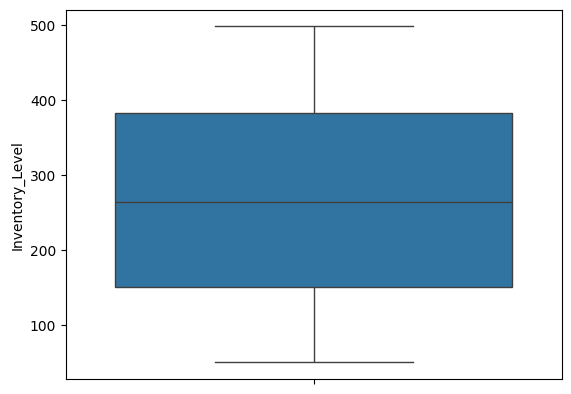

In [2615]:
sns.boxplot(data = df['Inventory_Level'])

In [2616]:
df['Inventory_Level'].isna().sum()

np.int64(29)

In [2617]:
inventory_null  = df['Inventory_Level'].isnull()

In [2618]:
df[inventory_null]

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost
22,869.0,High,Downward,South,Premium,16.0,4.635164,NaN,4.777955,19.0,10.997485,120.647916,48.255250,1.186851,575.145661,36.786207,5.0,21.861697
74,527.0,Medium,Upward,West,Premium,17.0,6.522611,NaN,14.993713,11.0,69.111331,16.509613,NaN,2.305208,2105.265567,64.769959,3.0,24.492967
113,610.5,Low,Stable,East,Premium,17.0,8.655362,NaN,19.145151,18.0,23.165514,168.257013,45.305299,1.448895,2520.703034,31.304029,1.0,14.884004
308,502.0,Low,Upward,South,Mid-Range,11.0,4.797243,NaN,45.888633,7.0,57.720671,NaN,NaN,9.301315,1023.900496,39.863669,9.0,20.442937
336,996.0,Low,Downward,North,Budget,5.0,1.956806,NaN,14.304496,11.0,12.353836,161.420074,NaN,0.655194,3627.147467,27.273168,1.0,46.881861
355,727.0,Low,Stable,East,Premium,2.0,4.728291,NaN,36.737964,12.0,58.719487,176.272989,46.571012,9.463729,4352.388709,15.555457,2.0,34.059423
423,611.0,High,Stable,West,Budget,18.0,4.432631,NaN,16.582892,6.0,43.295165,111.369072,55.495959,0.809626,NaN,45.262473,9.0,16.208457
448,355.0,Medium,Downward,East,Mid-Range,12.0,8.619030,NaN,13.133487,13.0,35.654557,92.147639,21.526829,7.750167,3391.800844,13.604066,3.0,23.843952
455,669.0,Medium,Upward,West,Mid-Range,11.0,3.183588,NaN,44.437624,18.0,55.297049,65.595690,28.215129,5.995242,2679.625516,NaN,3.0,19.965333
519,543.0,Low,Upward,West,Mid-Range,8.0,3.357061,NaN,48.080638,6.0,43.671977,114.616527,77.487368,9.504000,4449.026693,47.841961,4.0,36.408922


In [2619]:
grouped_mean_inventory = df.groupby(['Seasonality_Trend','Market_Trend'])['Inventory_Level'].mean().astype(int)

In [2620]:
grouped_mean_inventory

Seasonality_Trend  Market_Trend
High               Downward        253
                   Stable          296
                   Upward          253
Low                Downward        259
                   Stable          271
                   Upward          260
Medium             Downward        296
                   Stable          272
                   Upward          260
Name: Inventory_Level, dtype: int64

In [2621]:
df = df.merge(grouped_mean_inventory,on=['Seasonality_Trend','Market_Trend'],how='left',suffixes=('','_mean'))

In [2622]:
df['Inventory_Level'] = df['Inventory_Level'].fillna(df['Inventory_Level_mean'])

In [2623]:
df.drop(columns=['Inventory_Level_mean'],inplace=True)

In [2624]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Historical_Sales         994 non-null    float64
 1   Seasonality_Trend        994 non-null    object 
 2   Market_Trend             994 non-null    object 
 3   Region                   994 non-null    object 
 4   Customer_Segment         994 non-null    object 
 5   Purchase_History         994 non-null    float64
 6   Browsing_Time            994 non-null    float64
 7   Inventory_Level          994 non-null    float64
 8   Stock_Out_Rate           953 non-null    float64
 9   Lead_Time                971 non-null    float64
 10  Promotional_Discount     956 non-null    float64
 11  Competitor_Price         957 non-null    float64
 12  Bounce_Rate              947 non-null    float64
 13  Conversion_Rate          964 non-null    float64
 14  Customer_Lifetime_Value  9

<Axes: ylabel='Stock_Out_Rate'>

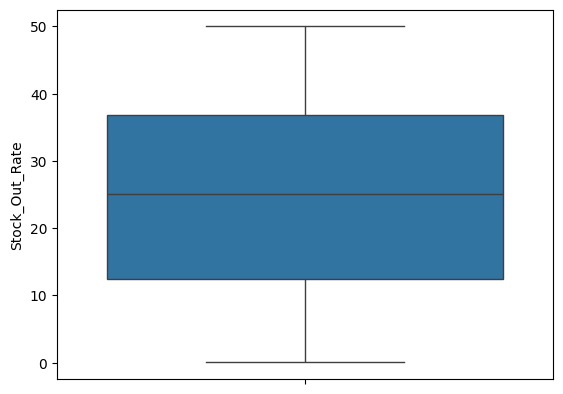

In [2625]:
sns.boxplot(data = df['Stock_Out_Rate'])

In [2626]:
df

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost
0,202.0,Medium,Downward,West,Premium,3.0,5.887003,415.0,22.417324,9.0,24.797399,10.257550,74.567648,5.681654,4489.273360,53.669712,6.0,19.881625
1,535.0,Medium,Upward,North,Premium,16.0,2.696263,275.0,24.461943,6.0,16.442579,104.446969,51.199887,NaN,855.706431,39.152220,1.0,5.673110
2,960.0,Low,Upward,East,Premium,2.0,3.569956,382.0,10.887435,2.0,56.124183,153.033709,67.276455,9.493574,1593.059872,51.599110,8.0,7.477158
3,370.0,Low,Downward,West,Mid-Range,10.0,2.942847,152.0,3.915084,9.0,25.315337,166.421044,33.670591,3.421855,644.792531,26.641372,8.0,17.692711
4,206.0,Low,Downward,South,Premium,6.0,0.503714,155.0,28.671591,17.0,64.438712,177.085429,49.413318,NaN,3501.084055,19.238732,9.0,36.029443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,863.0,Medium,Upward,East,Premium,9.0,3.281534,260.0,5.709189,1.0,NaN,39.126270,21.072412,7.613231,2466.500882,17.804137,5.0,13.719596
990,837.0,Medium,Stable,West,Premium,12.0,4.587751,172.0,25.915936,NaN,65.288606,183.802848,40.083361,NaN,1407.612115,48.871787,9.0,18.659341
991,905.0,Medium,Downward,West,Premium,10.0,6.520644,296.0,29.367390,8.0,9.308862,22.236972,31.032394,1.595801,2263.455802,36.592011,3.0,32.942574
992,405.0,High,Downward,East,Mid-Range,1.0,4.640367,131.0,8.710534,3.0,28.842383,20.457165,60.808571,7.036975,3559.784071,28.310248,4.0,24.172535


In [2627]:
df['Stock_Out_Rate'].mean()

np.float64(24.842402245222456)

In [2628]:
grp_sor =df.groupby(['Seasonality_Trend','Market_Trend'])['Stock_Out_Rate'].mean()

In [2629]:
df = df.merge(grp_sor,on=['Seasonality_Trend','Market_Trend'],how='left',suffixes=('','_mean'))

In [2630]:
df

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost,Stock_Out_Rate_mean
0,202.0,Medium,Downward,West,Premium,3.0,5.887003,415.0,22.417324,9.0,24.797399,10.257550,74.567648,5.681654,4489.273360,53.669712,6.0,19.881625,24.842960
1,535.0,Medium,Upward,North,Premium,16.0,2.696263,275.0,24.461943,6.0,16.442579,104.446969,51.199887,NaN,855.706431,39.152220,1.0,5.673110,26.640561
2,960.0,Low,Upward,East,Premium,2.0,3.569956,382.0,10.887435,2.0,56.124183,153.033709,67.276455,9.493574,1593.059872,51.599110,8.0,7.477158,23.088122
3,370.0,Low,Downward,West,Mid-Range,10.0,2.942847,152.0,3.915084,9.0,25.315337,166.421044,33.670591,3.421855,644.792531,26.641372,8.0,17.692711,25.553706
4,206.0,Low,Downward,South,Premium,6.0,0.503714,155.0,28.671591,17.0,64.438712,177.085429,49.413318,NaN,3501.084055,19.238732,9.0,36.029443,25.553706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,863.0,Medium,Upward,East,Premium,9.0,3.281534,260.0,5.709189,1.0,NaN,39.126270,21.072412,7.613231,2466.500882,17.804137,5.0,13.719596,26.640561
990,837.0,Medium,Stable,West,Premium,12.0,4.587751,172.0,25.915936,NaN,65.288606,183.802848,40.083361,NaN,1407.612115,48.871787,9.0,18.659341,26.808302
991,905.0,Medium,Downward,West,Premium,10.0,6.520644,296.0,29.367390,8.0,9.308862,22.236972,31.032394,1.595801,2263.455802,36.592011,3.0,32.942574,24.842960
992,405.0,High,Downward,East,Mid-Range,1.0,4.640367,131.0,8.710534,3.0,28.842383,20.457165,60.808571,7.036975,3559.784071,28.310248,4.0,24.172535,21.369886


In [2631]:
df['Stock_Out_Rate'] = df['Stock_Out_Rate'].fillna(df['Stock_Out_Rate_mean'])

In [2632]:
df.drop(columns = ['Stock_Out_Rate_mean'],inplace=True)

In [2633]:
df['Lead_Time'] = df['Lead_Time'].astype(float)


<Axes: ylabel='Lead_Time'>

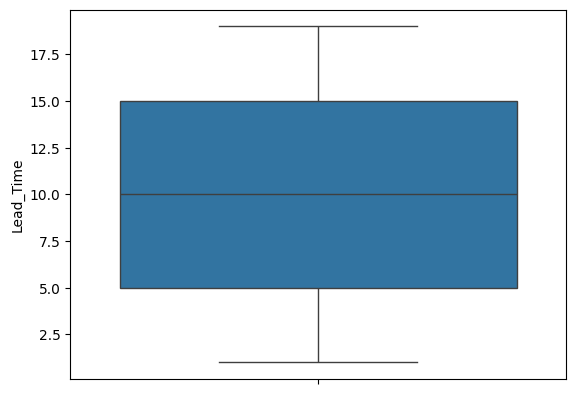

In [2634]:
sns.boxplot(data =df['Lead_Time'])

In [2635]:
mean_lead_time =round(df['Lead_Time'].mean())

In [2636]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Historical_Sales         994 non-null    float64
 1   Seasonality_Trend        994 non-null    object 
 2   Market_Trend             994 non-null    object 
 3   Region                   994 non-null    object 
 4   Customer_Segment         994 non-null    object 
 5   Purchase_History         994 non-null    float64
 6   Browsing_Time            994 non-null    float64
 7   Inventory_Level          994 non-null    float64
 8   Stock_Out_Rate           994 non-null    float64
 9   Lead_Time                971 non-null    float64
 10  Promotional_Discount     956 non-null    float64
 11  Competitor_Price         957 non-null    float64
 12  Bounce_Rate              947 non-null    float64
 13  Conversion_Rate          964 non-null    float64
 14  Customer_Lifetime_Value  9

In [2637]:
df['Lead_Time'] = df['Lead_Time'].fillna(mean_lead_time)

In [2638]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Historical_Sales         994 non-null    float64
 1   Seasonality_Trend        994 non-null    object 
 2   Market_Trend             994 non-null    object 
 3   Region                   994 non-null    object 
 4   Customer_Segment         994 non-null    object 
 5   Purchase_History         994 non-null    float64
 6   Browsing_Time            994 non-null    float64
 7   Inventory_Level          994 non-null    float64
 8   Stock_Out_Rate           994 non-null    float64
 9   Lead_Time                994 non-null    float64
 10  Promotional_Discount     956 non-null    float64
 11  Competitor_Price         957 non-null    float64
 12  Bounce_Rate              947 non-null    float64
 13  Conversion_Rate          964 non-null    float64
 14  Customer_Lifetime_Value  9

<Axes: ylabel='Promotional_Discount'>

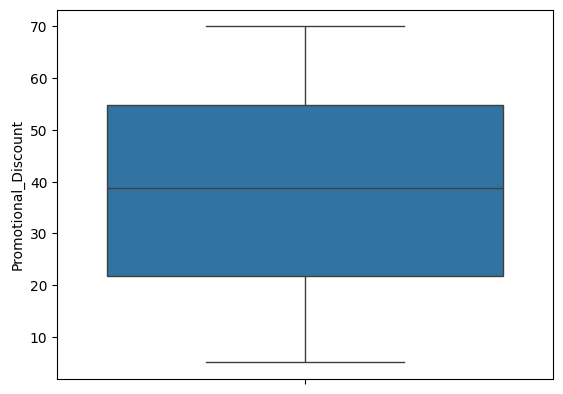

In [2639]:
sns.boxplot(data = df['Promotional_Discount'])

In [2640]:
mean_promotional_discount =df['Promotional_Discount'].mean()

In [2641]:
df['Promotional_Discount'] = df['Promotional_Discount'].fillna(mean_promotional_discount)

<Axes: ylabel='Competitor_Price'>

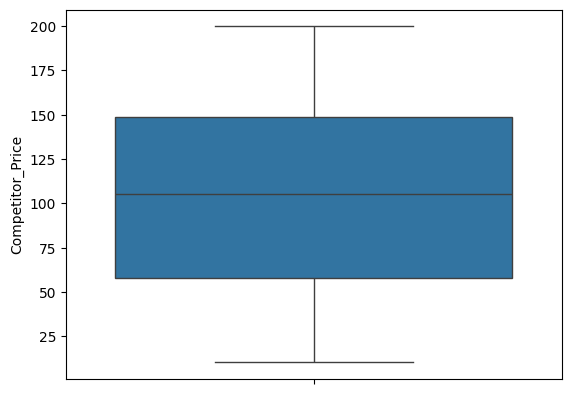

In [2642]:
sns.boxplot(data = df['Competitor_Price'])

In [2643]:
skewness=skew(df['Competitor_Price'],nan_policy = 'omit')

In [2644]:
print(skewness)
#Not that much skewed

-0.02017398499906375


In [2645]:
mean_comp_price =df['Competitor_Price'].mean()
mean_comp_price

np.float64(103.73927810127482)

In [2646]:
df['Competitor_Price'] = df['Competitor_Price'].fillna(mean_comp_price)

In [2647]:
null_bounce_rate =df['Bounce_Rate'].isna()
null_bounce_rate

0      False
1      False
2      False
3      False
4      False
       ...  
989    False
990    False
991    False
992    False
993    False
Name: Bounce_Rate, Length: 994, dtype: bool

In [2648]:
df[null_bounce_rate]

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost
18,602.5,Medium,Upward,South,Mid-Range,15.0,5.166962,249.0,39.568146,4.0,38.038212,107.181399,NaN,9.121231,1656.129804,41.306557,1.0,NaN
27,485.0,High,Downward,East,Budget,4.0,5.005101,448.0,8.698044,18.0,38.038212,75.637619,NaN,7.172048,1272.704652,39.194336,1.0,25.951798
35,847.0,Low,Downward,West,Budget,2.0,6.560141,53.0,20.685302,15.0,62.380810,163.903378,NaN,8.490934,-10.373429,23.989855,8.0,31.462464
59,266.0,High,Stable,South,Mid-Range,18.0,4.660664,478.0,7.181069,13.0,15.167750,191.131610,NaN,7.333306,3988.760027,24.825304,8.0,25.628227
67,445.0,High,Downward,South,Premium,11.0,2.724386,118.0,30.557076,10.0,52.222289,42.623159,NaN,2.664488,3856.202851,61.324569,9.0,16.836701
74,527.0,Medium,Upward,West,Premium,17.0,6.522611,260.0,14.993713,11.0,69.111331,16.509613,NaN,2.305208,2105.265567,64.769959,3.0,24.492967
112,891.0,Low,Stable,South,Mid-Range,10.0,1.559109,429.0,49.112803,11.0,33.416183,146.271654,NaN,7.522553,2825.661780,50.815794,9.0,42.695178
118,140.0,Low,Stable,South,Mid-Range,2.0,6.237260,497.0,28.910919,14.0,14.239155,59.115108,NaN,5.826975,2734.620315,49.804429,2.0,45.419951
126,443.0,High,Upward,West,Budget,15.0,4.581958,291.0,45.586392,16.0,8.561158,128.444174,NaN,1.738854,1035.931144,57.797784,9.0,42.493714
132,598.0,High,Upward,East,Premium,7.0,5.151755,245.0,43.447955,6.0,67.373623,163.216536,NaN,6.078392,2352.760724,45.311000,NaN,30.854197


<Axes: ylabel='Bounce_Rate'>

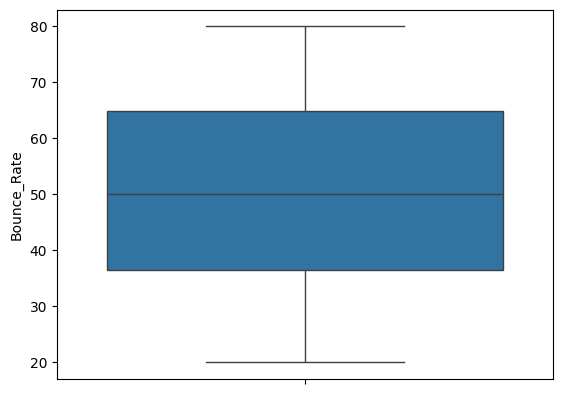

In [2649]:
sns.boxplot(df['Bounce_Rate'])

In [2650]:
skewness = skew(df['Bounce_Rate'],nan_policy='omit')
skewness
#Data is almost symmetric

np.float64(-0.033042913847543987)

In [2651]:
mean_bounce_rate =df['Bounce_Rate'].mean()

In [2652]:
df['Bounce_Rate'] = df['Bounce_Rate'].fillna(mean_bounce_rate)

<Axes: ylabel='Conversion_Rate'>

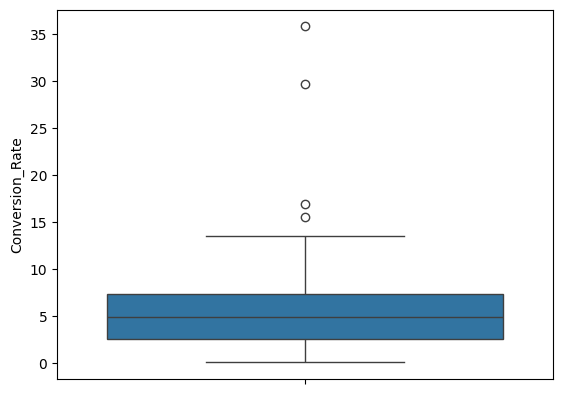

In [2653]:
sns.boxplot(df['Conversion_Rate'])

In [2654]:
cr = df['Conversion_Rate']>14

In [2655]:
df[cr]

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost
62,7000.0,Medium,Upward,North,Budget,15.0,8.396186,77.0,39.325286,10.0,59.718649,11.557681,72.223754,35.833310,4725.064778,67.369575,1.0,32.064196
107,7371.0,High,Upward,West,Premium,10.0,6.789447,348.0,37.527208,18.0,5.424152,174.073841,76.498091,15.557072,3061.094945,41.605283,7.0,48.389909
248,1060.0,Low,Downward,North,Premium,5.0,0.487500,242.0,30.388922,2.0,7.166008,103.739278,57.378373,29.673298,4947.251860,44.480945,1.0,42.894888
960,6500.0,High,Stable,North,Mid-Range,6.0,5.657866,96.0,44.442755,14.0,10.147117,12.031478,51.489005,16.932519,4555.974263,59.910114,8.0,21.478857


In [2656]:
df['Browsing_Time'].mean()

np.float64(5.069745866404427)

In [2657]:
df['Browsing_Time'].median()

np.float64(5.005101152)

In [2658]:
df['Browsing_Time'].min()

np.float64(0.003012824)

In [2659]:
df['Browsing_Time'].max()

np.float64(10.53195923)

In [2660]:
def Browsing_Bucket(time):
    if time<2:
        return '0-2'
    elif time<5:
        return '3-5'
    elif time<8:
        return '6-8'
    elif time<11:
        return '9-11'
df['Browsing_Bucket'] = df['Browsing_Time'].apply(Browsing_Bucket)

In [2661]:
df

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost,Browsing_Bucket
0,202.0,Medium,Downward,West,Premium,3.0,5.887003,415.0,22.417324,9.0,24.797399,10.257550,74.567648,5.681654,4489.273360,53.669712,6.0,19.881625,6-8
1,535.0,Medium,Upward,North,Premium,16.0,2.696263,275.0,24.461943,6.0,16.442579,104.446969,51.199887,NaN,855.706431,39.152220,1.0,5.673110,3-5
2,960.0,Low,Upward,East,Premium,2.0,3.569956,382.0,10.887435,2.0,56.124183,153.033709,67.276455,9.493574,1593.059872,51.599110,8.0,7.477158,3-5
3,370.0,Low,Downward,West,Mid-Range,10.0,2.942847,152.0,3.915084,9.0,25.315337,166.421044,33.670591,3.421855,644.792531,26.641372,8.0,17.692711,3-5
4,206.0,Low,Downward,South,Premium,6.0,0.503714,155.0,28.671591,17.0,64.438712,177.085429,49.413318,NaN,3501.084055,19.238732,9.0,36.029443,0-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,863.0,Medium,Upward,East,Premium,9.0,3.281534,260.0,5.709189,1.0,38.038212,39.126270,21.072412,7.613231,2466.500882,17.804137,5.0,13.719596,3-5
990,837.0,Medium,Stable,West,Premium,12.0,4.587751,172.0,25.915936,10.0,65.288606,183.802848,40.083361,NaN,1407.612115,48.871787,9.0,18.659341,3-5
991,905.0,Medium,Downward,West,Premium,10.0,6.520644,296.0,29.367390,8.0,9.308862,22.236972,31.032394,1.595801,2263.455802,36.592011,3.0,32.942574,6-8
992,405.0,High,Downward,East,Mid-Range,1.0,4.640367,131.0,8.710534,3.0,28.842383,20.457165,60.808571,7.036975,3559.784071,28.310248,4.0,24.172535,3-5


In [2662]:
#Now we can calculate median of conversion rate wrt browsing time
median_browsing_bucket=df.groupby('Browsing_Bucket')['Conversion_Rate'].median()
median_browsing_bucket

Browsing_Bucket
0-2     5.400184
3-5     4.938440
6-8     4.817231
9-11    5.565121
Name: Conversion_Rate, dtype: float64

In [2663]:
df = df.merge(median_browsing_bucket,on=['Browsing_Bucket'],how='left' , suffixes=('','_median'))

In [2664]:

df['Conversion_Rate'] = df['Conversion_Rate'].fillna(df['Conversion_Rate_median'])



In [2665]:

df.drop(columns = ['Conversion_Rate_median'],inplace=True)


<Axes: ylabel='Customer_Lifetime_Value'>

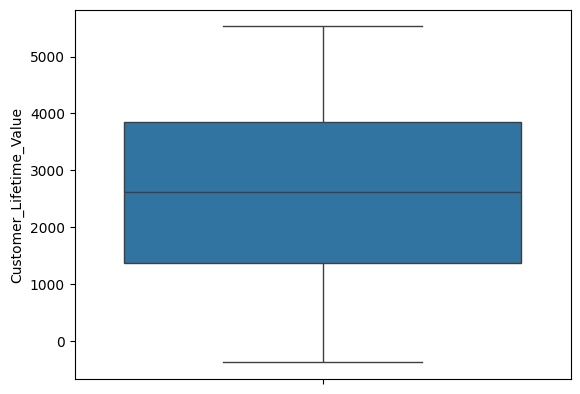

In [2666]:
sns.boxplot(data=df['Customer_Lifetime_Value'])

In [2667]:
skewness = skew(df['Customer_Lifetime_Value'],nan_policy='omit')

In [2668]:
skewness


np.float64(-0.0588599948786788)

In [2669]:
#Null values can be replaced by mean
neg_clv =df['Customer_Lifetime_Value']<0

In [2670]:
df[neg_clv] # clv can be negative depending on the budget company spent , nd revenue generated by it

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost,Browsing_Bucket
35,847.0,Low,Downward,West,Budget,2.0,6.560141,53.0,20.685302,15.0,62.380810,163.903378,50.281066,8.490934,-10.373429,23.989855,8.0,31.462464,6-8
95,301.0,High,Upward,South,Budget,19.0,3.431019,264.0,47.954212,12.0,13.244855,11.125572,32.414971,8.797320,-39.297923,16.235819,2.0,14.592389,3-5
352,153.0,Medium,Downward,South,Premium,15.0,3.965634,96.0,6.178324,12.0,10.133739,42.324762,51.815794,5.514471,-100.515636,15.464295,9.0,20.973471,3-5
496,933.0,High,Upward,East,Premium,8.0,5.901783,322.0,19.431547,12.0,12.375042,108.736900,36.126878,0.691138,-7.341678,15.311659,NaN,11.915427,6-8
564,303.0,Medium,Downward,North,Mid-Range,14.0,7.302439,490.0,3.836170,10.0,57.370812,111.631776,44.276353,2.332028,-16.376812,62.128095,4.0,26.936141,6-8
645,706.0,High,Stable,North,Budget,17.0,4.092415,275.0,33.016792,17.0,30.398944,111.533257,70.342950,4.938440,-371.952579,16.447003,8.0,8.491480,3-5
650,853.0,Low,Downward,South,Mid-Range,13.0,7.276831,97.0,37.405283,9.0,21.068333,51.097179,75.346137,0.110761,-60.858647,59.340481,7.0,27.051913,6-8
782,400.0,Medium,Downward,East,Premium,3.0,5.594790,133.0,24.842960,19.0,48.603734,177.030943,69.512897,3.201906,-172.897211,62.429272,9.0,23.076929,6-8
828,914.0,High,Upward,North,Premium,1.0,8.037437,379.0,17.812495,3.0,38.038212,199.904307,79.398837,9.633244,-92.825052,27.545145,3.0,19.650957,9-11
877,657.0,Medium,Stable,South,Mid-Range,6.0,10.003290,108.0,20.353839,17.0,32.268391,11.478954,44.881887,0.802911,-118.146700,57.413774,9.0,31.301034,9-11


In [2671]:
mean_clv = df['Customer_Lifetime_Value'].mean()
mean_clv

np.float64(2599.512415056869)

In [2672]:
Mean_Clv=df.groupby(['Seasonality_Trend','Market_Trend'])['Customer_Lifetime_Value'].mean()

In [2673]:
df =df.merge(Mean_Clv,on = ['Seasonality_Trend','Market_Trend'],how='inner',suffixes = ('','_Mean'))

In [2674]:
df['Customer_Lifetime_Value'] = df['Customer_Lifetime_Value'].fillna(df['Customer_Lifetime_Value_Mean'])

In [2675]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Historical_Sales              994 non-null    float64
 1   Seasonality_Trend             994 non-null    object 
 2   Market_Trend                  994 non-null    object 
 3   Region                        994 non-null    object 
 4   Customer_Segment              994 non-null    object 
 5   Purchase_History              994 non-null    float64
 6   Browsing_Time                 994 non-null    float64
 7   Inventory_Level               994 non-null    float64
 8   Stock_Out_Rate                994 non-null    float64
 9   Lead_Time                     994 non-null    float64
 10  Promotional_Discount          994 non-null    float64
 11  Competitor_Price              994 non-null    float64
 12  Bounce_Rate                   994 non-null    float64
 13  Conve

<Axes: ylabel='Gross_Margin'>

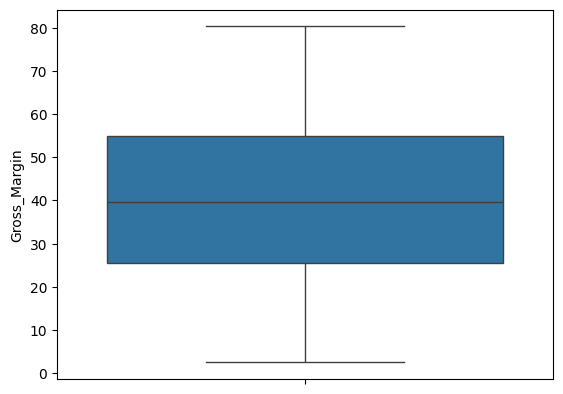

In [2676]:
sns.boxplot(data =df['Gross_Margin'])

In [2677]:
mean_margin = df['Gross_Margin'].mean()

In [2678]:
df['Gross_Margin'] = df['Gross_Margin'].fillna(mean_margin)

<Axes: ylabel='Sustainability_Score'>

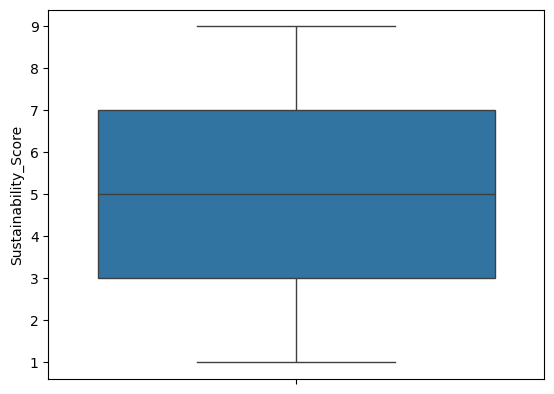

In [2679]:
sns.boxplot(df['Sustainability_Score'])

<Axes: ylabel='Sustainability_Score'>

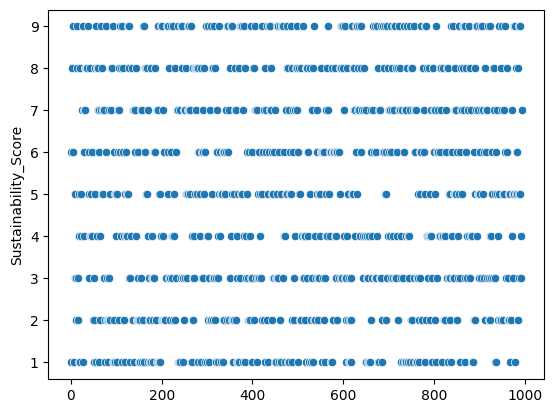

In [2680]:
sns.scatterplot(df['Sustainability_Score'])

In [2681]:
sustainability_mean= df['Sustainability_Score'].mean()

In [2682]:
df['Sustainability_Score'] =  df['Sustainability_Score'].fillna(sustainability_mean)

<Axes: ylabel='Shipping_Cost'>

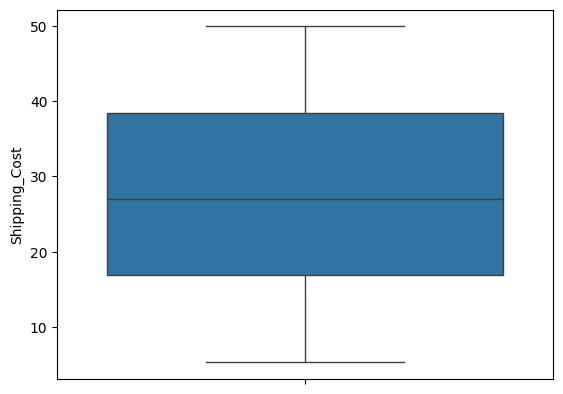

In [2683]:
sns.boxplot(df['Shipping_Cost'])

In [2684]:
skewness = skew(df['Shipping_Cost'] , nan_policy = 'omit' )

In [2685]:
skewness

np.float64(0.07137304091234332)

In [2686]:
mean_skewness = df['Shipping_Cost'].mean()
df['Shipping_Cost'] = df['Shipping_Cost'].fillna(mean_skewness)

In [2687]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Historical_Sales              994 non-null    float64
 1   Seasonality_Trend             994 non-null    object 
 2   Market_Trend                  994 non-null    object 
 3   Region                        994 non-null    object 
 4   Customer_Segment              994 non-null    object 
 5   Purchase_History              994 non-null    float64
 6   Browsing_Time                 994 non-null    float64
 7   Inventory_Level               994 non-null    float64
 8   Stock_Out_Rate                994 non-null    float64
 9   Lead_Time                     994 non-null    float64
 10  Promotional_Discount          994 non-null    float64
 11  Competitor_Price              994 non-null    float64
 12  Bounce_Rate                   994 non-null    float64
 13  Conve

In [2688]:
#Our data is cleaned , and we ready for EDA

In [2689]:
df.describe()

,Historical_Sales,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost,Customer_Lifetime_Value_Mean
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,590.676056,10.312877,5.069746,269.071429,24.830272,10.194165,38.038212,103.739278,50.281066,5.059306,2599.833894,40.026866,4.970742,27.619634,2599.833894
std,527.332615,5.342235,1.885462,130.240307,14.208107,5.524779,18.849171,52.834559,16.761584,3.129698,1415.002724,17.634313,2.578316,12.671990,127.396672
min,100.000000,1.000000,0.003013,50.000000,0.031376,1.000000,5.102662,10.257550,20.011112,0.110761,-371.952579,2.476243,1.000000,5.322850,2433.460656
25%,329.000000,6.000000,3.814137,152.000000,12.959711,5.000000,22.426082,59.193657,37.213546,2.637581,1420.707585,25.643679,3.000000,17.393043,2484.946714
50%,557.500000,10.000000,5.005101,263.000000,24.974457,10.000000,38.038212,103.739278,50.281066,4.938440,2620.057314,39.899253,5.000000,27.619634,2563.292318
75%,785.750000,15.000000,6.326535,379.750000,36.410381,15.000000,54.332987,146.717433,64.354915,7.353434,3802.123320,54.839756,7.000000,38.157928,2666.643314
max,7768.000000,19.000000,10.531959,498.000000,49.992462,19.000000,69.983183,199.904307,79.961896,35.833310,5530.414206,80.330535,9.000000,49.920976,2851.801566


In [2690]:
df.columns

Index(['Historical_Sales', 'Seasonality_Trend', 'Market_Trend', 'Region',
       'Customer_Segment', 'Purchase_History', 'Browsing_Time',
       'Inventory_Level', 'Stock_Out_Rate', 'Lead_Time',
       'Promotional_Discount', 'Competitor_Price', 'Bounce_Rate',
       'Conversion_Rate', 'Customer_Lifetime_Value', 'Gross_Margin',
       'Sustainability_Score', 'Shipping_Cost', 'Browsing_Bucket',
       'Customer_Lifetime_Value_Mean'],
      dtype='object')

In [2691]:
df['Historical_Sales'].mean()

np.float64(590.6760563380282)

In [2692]:
#So lets check Historical Sales according to seasonality  trend
low_seasonality_trend = df[df['Seasonality_Trend']=='Low']['Historical_Sales']

In [2693]:
low_seasonality_trend

2      960.0
3      370.0
4      206.0
5      171.0
10     566.0
       ...  
982    952.0
983    677.0
984    174.0
985    534.0
987    521.0
Name: Historical_Sales, Length: 318, dtype: float64

In [2694]:
sum_low_seasonality_trend =low_seasonality_trend.sum()
print(sum_low_seasonality_trend)

186010.5


In [2695]:
mean_low_seasonality_trend =low_seasonality_trend.mean()
print(mean_low_seasonality_trend)

584.938679245283


In [2696]:
medium_seasonality_trend = df[df['Seasonality_Trend']=='Medium']['Historical_Sales']

In [2697]:
sum_medium_seasonality_trend = medium_seasonality_trend.sum()
print(sum_medium_seasonality_trend)

189728.5


In [2698]:
mean_medium_seasonality_trend = medium_seasonality_trend.mean()
print(mean_medium_seasonality_trend)

602.3126984126984


In [2699]:
high_seasonality_trend = df[df['Seasonality_Trend']=='High']['Historical_Sales']

In [2700]:
sum_high_seasonality_trend = high_seasonality_trend.sum()
print(sum_high_seasonality_trend)

211393.0


In [2701]:
mean_high_seasonality_trend = high_seasonality_trend.mean()
print(mean_high_seasonality_trend)

585.5761772853185


In [2702]:
seasonality_historic_sales = {'Low':sum_low_seasonality_trend ,'Medium':sum_medium_seasonality_trend ,'High':sum_high_seasonality_trend}

In [2703]:
seasonality_bucket = list(seasonality_historic_sales.keys())
total_sales = list(seasonality_historic_sales.values())

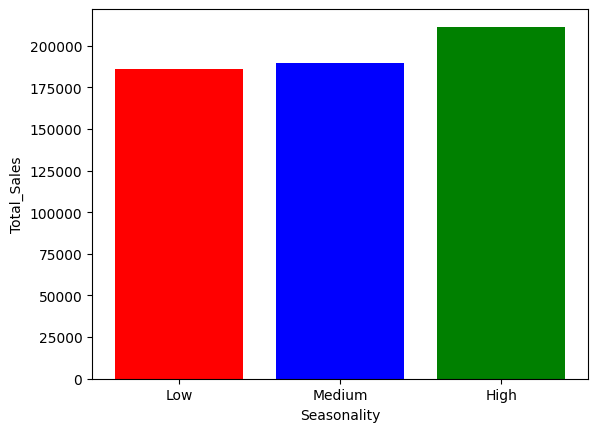

In [2704]:
plt.xlabel('Seasonality')
plt.ylabel('Total_Sales')
plt.bar(seasonality_bucket,total_sales, color=['red','blue','green'])
plt.show()


Here , we are comparing total sales according to Seasonality. Low seasonality has the lowest sales , while Medium seasonality has
slightly larger sales comapred to low seasonality level.High seasonality level has the highest sales.

In [2705]:
#Lets go through Market Trends
downward_market_trend = df[df['Market_Trend']=='Downward']['Historical_Sales']
print(downward_market_trend)

0      202.0
3      370.0
4      206.0
5      171.0
8      714.0
       ...  
985    534.0
987    521.0
988    803.0
991    905.0
992    405.0
Name: Historical_Sales, Length: 299, dtype: float64


In [2706]:
sum_downward_market_trend = downward_market_trend.sum()
print(sum_downward_market_trend)

177520.0


In [2707]:
upward_market_trend = df[df['Market_Trend']=='Upward']['Historical_Sales']

In [2708]:
sum_upward_market_trend = upward_market_trend.sum()
print(sum_upward_market_trend)

217404.0


In [2709]:
stable_market_trend = df[df['Market_Trend']=='Stable']['Historical_Sales']


In [2710]:
sum_stable_market_trend  = stable_market_trend.sum()
print(sum_stable_market_trend )

192208.0


In [2711]:
historic_sales_m_trend = {'Downward':sum_downward_market_trend , 'Upward': sum_upward_market_trend , 'Stable': sum_stable_market_trend}

In [2712]:
trend_bucket = list(historic_sales_m_trend.keys())
total_sales = list(historic_sales_m_trend.values())

Text(0, 0.5, 'Total_Sales')

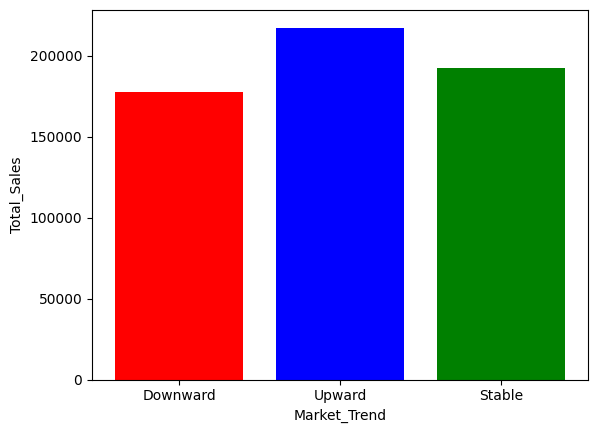

In [2713]:
plt.bar(trend_bucket,total_sales , color = ['red','blue','green'])
plt.xlabel('Market_Trend')
plt.ylabel('Total_Sales')

Here , we are comapring sales according to market trends . Downward trend record the lowest sales , upward trend has the max sales and stable market trend
has somewhat medium sales

In [2714]:
#lETS COMPARE SEASONALITY AND MARKET TRENDS COMBINATION , AND ANALYSE SALES


In [2715]:

comb_sales = df.groupby(['Seasonality_Trend','Market_Trend'])['Historical_Sales'].sum()
comb_sales

Seasonality_Trend  Market_Trend
High               Downward        63394.5
                   Stable          71365.0
                   Upward          76633.5
Low                Downward        56845.5
                   Stable          63920.5
                   Upward          65244.5
Medium             Downward        57280.0
                   Stable          56922.5
                   Upward          75526.0
Name: Historical_Sales, dtype: float64

In [2716]:
comb_sales=comb_sales.reset_index()

In [2717]:
comb_sales

,Seasonality_Trend,Market_Trend,Historical_Sales
0,High,Downward,63394.5
1,High,Stable,71365.0
2,High,Upward,76633.5
3,Low,Downward,56845.5
4,Low,Stable,63920.5
5,Low,Upward,65244.5
6,Medium,Downward,57280.0
7,Medium,Stable,56922.5
8,Medium,Upward,75526.0


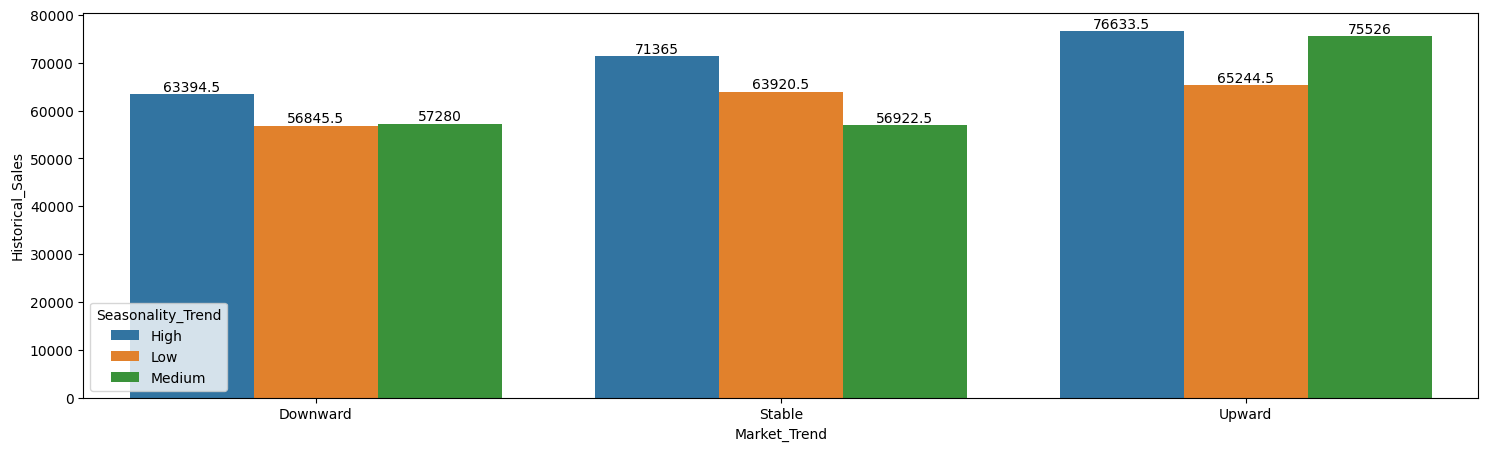

In [2718]:
plt.figure(figsize=(18,5))
ax =sns.barplot(data = comb_sales , x = 'Market_Trend' , y = 'Historical_Sales' , hue = 'Seasonality_Trend',legend = True)
for x in ax.containers:
    ax.bar_label(x)

In [2719]:
# #from above graph we can conclude that
# When the market trend was Upward, the Seasonality Trend reached its peak, and the same was observed for both Stable and Downward market trends.
# During periods of Medium Seasonality Trend combined with an Upward Market Trend, sales were significantly higher.
# In a Stable Market Trend, sales were higher with a Low Seasonality Trend compared to a Medium Seasonality Trend.
# For a Downward Market Trend, there was only a slight variation in sales between the Low and Medium Seasonality Trends.

In [2720]:
sum_sales_region = df.groupby('Region')['Historical_Sales'].sum()
sum_sales_region=sum_sales_region.reset_index()

In [2721]:
df.groupby('Region')['Region'].count()

Region
East     227
North    243
South    233
West     291
Name: Region, dtype: int64

In [2722]:
sum_sales_region

,Region,Historical_Sales
0,East,141127.5
1,North,144503.0
2,South,137704.0
3,West,163797.5


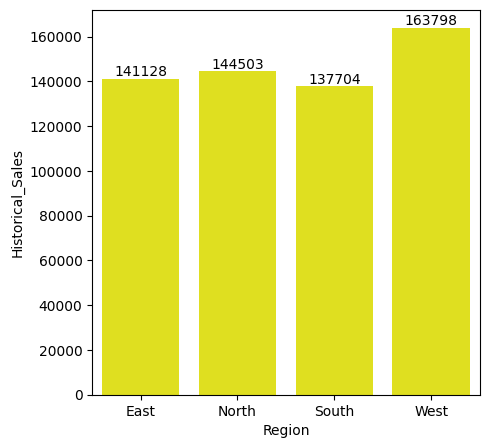

In [2723]:
plt.figure(figsize=(5,5))
ax = sns.barplot(data = sum_sales_region , x= 'Region' , y ='Historical_Sales',color='yellow')
for x in ax.containers:
    ax.bar_label(x)

In [2724]:
#We can clearly see West Region has contributed most  in sales , then south followed by North and East

In [2725]:
region_market_trend_sales_ses = df.groupby(['Region', 'Market_Trend' , 'Seasonality_Trend'])['Historical_Sales'].sum()
region_market_trend_sales_ses

Region  Market_Trend  Seasonality_Trend
East    Downward      High                 22848.0
                      Low                  11928.0
                      Medium               22388.0
        Stable        High                 10666.0
                      Low                  14384.5
                      Medium               10783.0
        Upward        High                 12689.0
                      Low                  20345.0
                      Medium               15096.0
North   Downward      High                 15602.0
                      Low                  11010.0
                      Medium                7859.0
        Stable        High                 21566.0
                      Low                  15171.0
                      Medium               14101.5
        Upward        High                 21366.0
                      Low                  15074.0
                      Medium               22753.5
South   Downward      High                

In [2726]:
region_market_trend_sales_ses = region_market_trend_sales_ses.reset_index()
region_market_trend_sales_ses

,Region,Market_Trend,Seasonality_Trend,Historical_Sales
0,East,Downward,High,22848.0
1,East,Downward,Low,11928.0
2,East,Downward,Medium,22388.0
3,East,Stable,High,10666.0
4,East,Stable,Low,14384.5
5,East,Stable,Medium,10783.0
6,East,Upward,High,12689.0
7,East,Upward,Low,20345.0
8,East,Upward,Medium,15096.0
9,North,Downward,High,15602.0


<Axes: xlabel='Region', ylabel='Historical_Sales'>

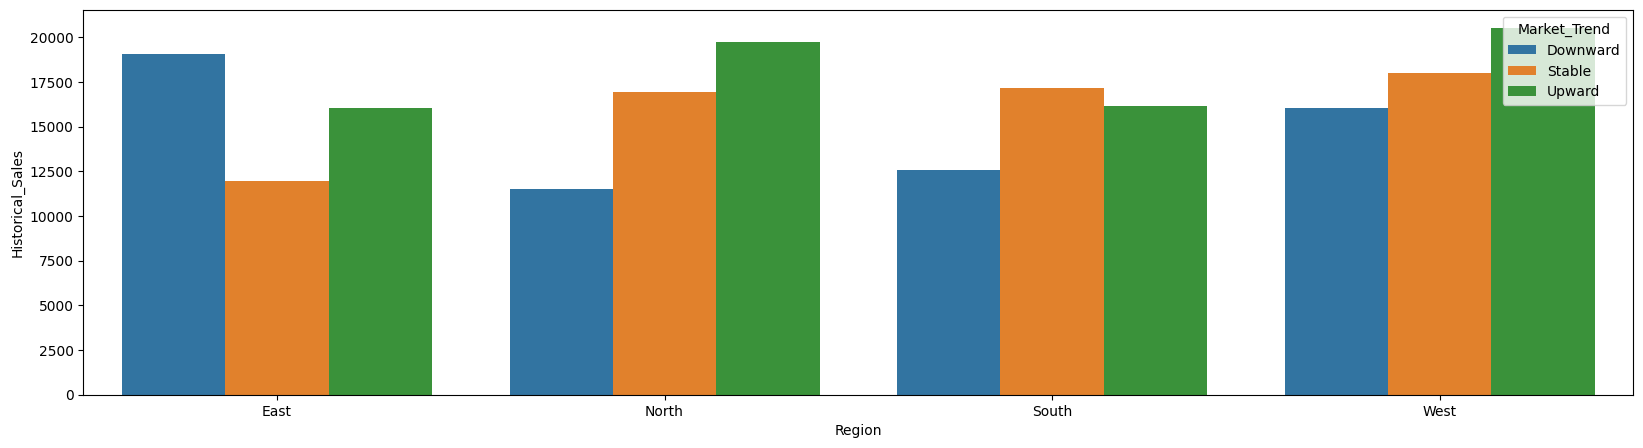

In [2727]:
plt.figure(figsize=(20,5))
sns.barplot(data = region_market_trend_sales_ses , x='Region' , y = 'Historical_Sales' , hue = 'Market_Trend',errorbar=None)

In [2728]:
# Well if we comapre total sales across regions then
# In East when market trend was downward sales were maximum  and lower when market trend was upward.
# In North when market trend was upward sales were maximum and lower when market trend was downward,
# In South when when market was Stable sales were maximum and lower when market trend was lower.
# In West when market trend was upward sales were maximum and lower when market trend was downward

<Axes: xlabel='Region', ylabel='Historical_Sales'>

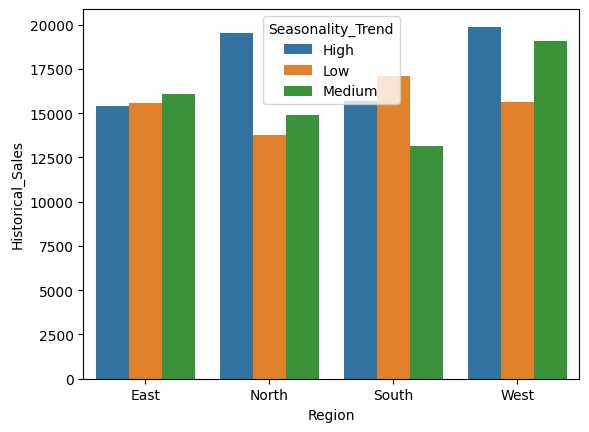

In [2729]:
sns.barplot(data = region_market_trend_sales_ses , x='Region' , y = 'Historical_Sales' , hue = 'Seasonality_Trend',errorbar=None)

In [2730]:
#When we see the above graph , in East the seasonality trend does not effect sales at a significant level.
#In north , sales are higher when seasonality trend is max followed by Medium and Low
#In South sales are max when trend is Low , followed by Higj then medium
#In west  sales are higher when seasonality trend is max followed by Medium and Low

In [2731]:
df.columns

Index(['Historical_Sales', 'Seasonality_Trend', 'Market_Trend', 'Region',
       'Customer_Segment', 'Purchase_History', 'Browsing_Time',
       'Inventory_Level', 'Stock_Out_Rate', 'Lead_Time',
       'Promotional_Discount', 'Competitor_Price', 'Bounce_Rate',
       'Conversion_Rate', 'Customer_Lifetime_Value', 'Gross_Margin',
       'Sustainability_Score', 'Shipping_Cost', 'Browsing_Bucket',
       'Customer_Lifetime_Value_Mean'],
      dtype='object')

In [2732]:


count_cust_seg =df.groupby('Customer_Segment')['Customer_Segment'].count()
count_cust_seg

Customer_Segment
Budget       369
Mid-Range    300
Premium      325
Name: Customer_Segment, dtype: int64

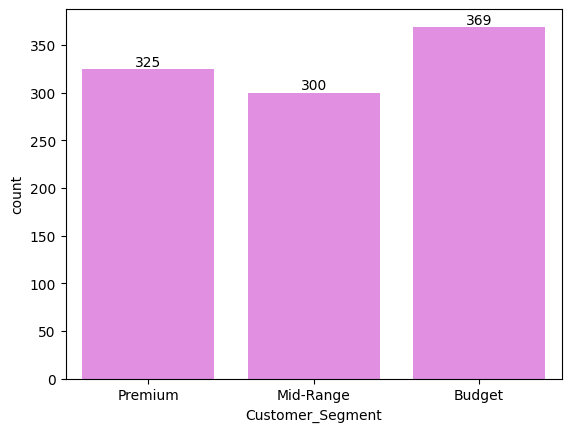

In [2733]:
ax=sns.countplot(data=df ,x='Customer_Segment',color ='violet')
for i in ax.containers:
    ax.bar_label(i)

In [2734]:
#Budget products had the most number of products sold , followed by premium then mid range

In [2735]:
#Budget had sold the most product , followed by premium then mid -range
sales_cust_seg = df.groupby('Customer_Segment')['Historical_Sales'].sum()
sales_cust_seg = sales_cust_seg.reset_index()
sales_cust_seg

,Customer_Segment,Historical_Sales
0,Budget,218437.0
1,Mid-Range,174604.5
2,Premium,194090.5


<Axes: xlabel='Customer_Segment', ylabel='Historical_Sales'>

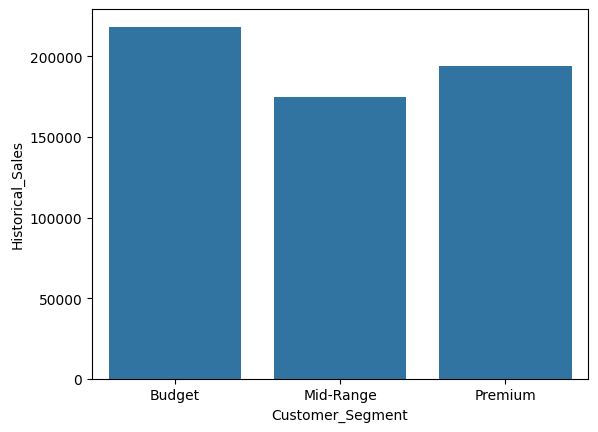

In [2736]:
sns.barplot(data = sales_cust_seg , x = 'Customer_Segment', y ='Historical_Sales')

In [2737]:
#Budget product made the most no of sales followed by premium and mid range

In [2738]:
mean_sales_cust_seg = df.groupby('Customer_Segment')['Historical_Sales'].mean()
mean_sales_cust_seg = mean_sales_cust_seg.reset_index()
mean_sales_cust_seg

,Customer_Segment,Historical_Sales
0,Budget,591.970190
1,Mid-Range,582.015000
2,Premium,597.201538


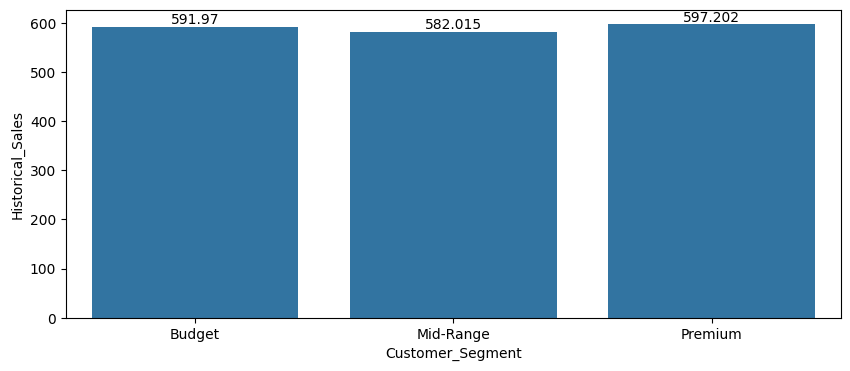

In [2739]:
plt.figure(figsize=(10,4))
ax =sns.barplot(data = mean_sales_cust_seg , x='Customer_Segment' , y = 'Historical_Sales')
for i in ax.containers:
    ax.bar_label(i)


In [2740]:
#Average of sales were higher in premium , followed by budget and mid range

In [2741]:
#Lets find out what was the distribution of customer segment , across varios regions
cust_segment_region_count = df.groupby(['Region','Customer_Segment'])['Customer_Segment'].count()
print(type(cust_segment_region_count))



<class 'pandas.core.series.Series'>


In [2742]:
cust_segment_region_count.name = 'Count'
cust_segment_region_count = cust_segment_region_count.reset_index()
cust_segment_region_count

,Region,Customer_Segment,Count
0,East,Budget,83
1,East,Mid-Range,67
2,East,Premium,77
3,North,Budget,90
4,North,Mid-Range,78
5,North,Premium,75
6,South,Budget,90
7,South,Mid-Range,77
8,South,Premium,66
9,West,Budget,106


<Axes: xlabel='Region', ylabel='Count'>

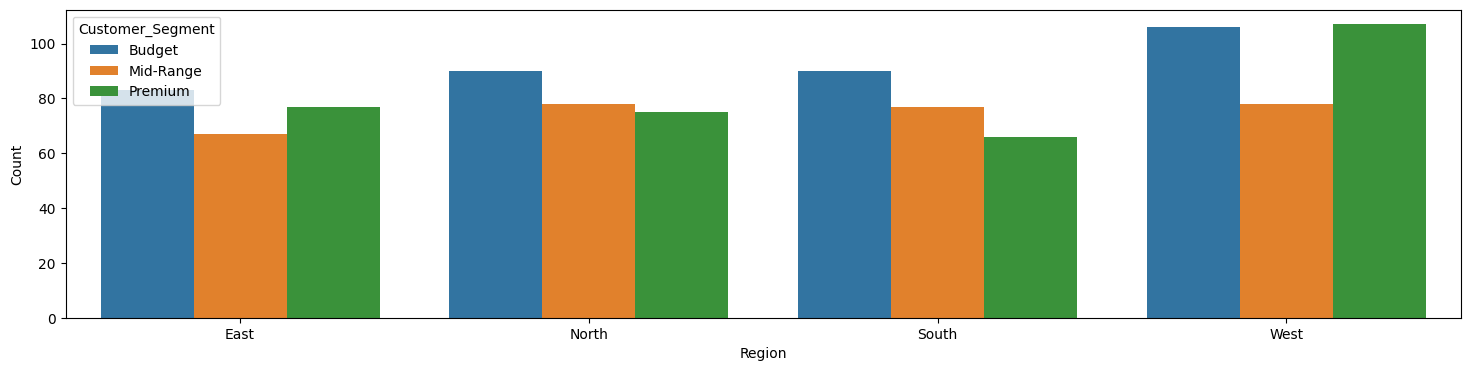

In [2743]:
plt.figure(figsize =(18,4))
sns.barplot(data = cust_segment_region_count,x = 'Region' , y = 'Count' , hue = 'Customer_Segment')

In [2744]:
#Budget segment had the most number of buyers in evry region
#In east mid range buyers were less compared to Premium segmented
#In north and south mid range was the 2nd most bought segment followed by premium
#In west  premium w=nd budget had equal buyers , while mid range was lowest

In [2745]:
cust_region_sales =df.groupby(['Customer_Segment' , 'Region'])['Historical_Sales'].sum().reset_index()
cust_region_sales

,Customer_Segment,Region,Historical_Sales
0,Budget,East,51376.0
1,Budget,North,55415.5
2,Budget,South,50995.0
3,Budget,West,60650.5
4,Mid-Range,East,39203.0
5,Mid-Range,North,48898.0
6,Mid-Range,South,44955.5
7,Mid-Range,West,41548.0
8,Premium,East,50548.5
9,Premium,North,40189.5


<Axes: xlabel='Region', ylabel='Historical_Sales'>

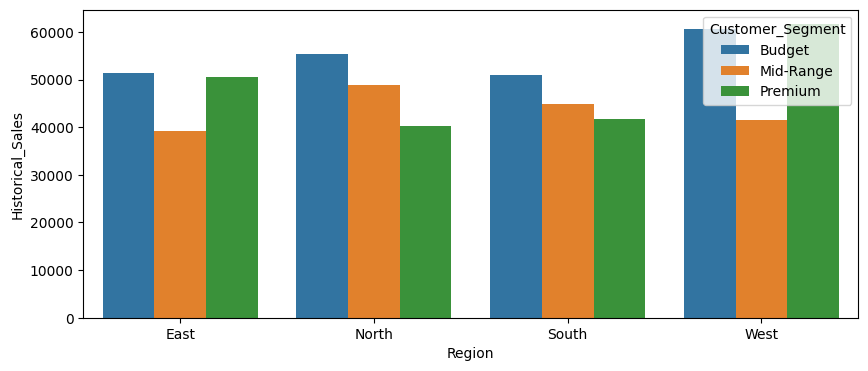

In [2746]:
plt.figure(figsize = (10,4))
sns.barplot(data = cust_region_sales , x = 'Region' , y = 'Historical_Sales' , hue = 'Customer_Segment' )

In [2747]:
#We can see in east , north and south budget segemted products made majority of sales
#In  north  and south , mid range products got the second most sales , while in west Premium products made the most sale.

In [2748]:
df.drop(columns = ['Customer_Lifetime_Value_Mean'],inplace=True)

In [2749]:
df

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost,Browsing_Bucket
0,202.0,Medium,Downward,West,Premium,3.0,5.887003,415.0,22.417324,9.0,24.797399,10.257550,74.567648,5.681654,4489.273360,53.669712,6.0,19.881625,6-8
1,535.0,Medium,Upward,North,Premium,16.0,2.696263,275.0,24.461943,6.0,16.442579,104.446969,51.199887,4.938440,855.706431,39.152220,1.0,5.673110,3-5
2,960.0,Low,Upward,East,Premium,2.0,3.569956,382.0,10.887435,2.0,56.124183,153.033709,67.276455,9.493574,1593.059872,51.599110,8.0,7.477158,3-5
3,370.0,Low,Downward,West,Mid-Range,10.0,2.942847,152.0,3.915084,9.0,25.315337,166.421044,33.670591,3.421855,644.792531,26.641372,8.0,17.692711,3-5
4,206.0,Low,Downward,South,Premium,6.0,0.503714,155.0,28.671591,17.0,64.438712,177.085429,49.413318,5.400184,3501.084055,19.238732,9.0,36.029443,0-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,863.0,Medium,Upward,East,Premium,9.0,3.281534,260.0,5.709189,1.0,38.038212,39.126270,21.072412,7.613231,2466.500882,17.804137,5.0,13.719596,3-5
990,837.0,Medium,Stable,West,Premium,12.0,4.587751,172.0,25.915936,10.0,65.288606,183.802848,40.083361,4.938440,1407.612115,48.871787,9.0,18.659341,3-5
991,905.0,Medium,Downward,West,Premium,10.0,6.520644,296.0,29.367390,8.0,9.308862,22.236972,31.032394,1.595801,2263.455802,36.592011,3.0,32.942574,6-8
992,405.0,High,Downward,East,Mid-Range,1.0,4.640367,131.0,8.710534,3.0,28.842383,20.457165,60.808571,7.036975,3559.784071,28.310248,4.0,24.172535,3-5


In [2750]:
total_items_sold = print(df['Purchase_History'].sum())

10251.0


In [2751]:
purchase_hist_cs =df.groupby('Customer_Segment')['Purchase_History'].sum().reset_index()

<Axes: xlabel='Customer_Segment', ylabel='Historical_Sales'>

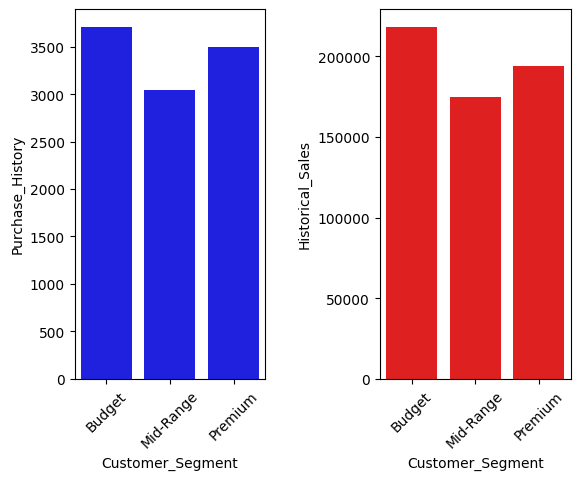

In [2752]:
plt.subplot(1, 2, 1)
plt.xticks(rotation = 45)

sns.barplot(data = purchase_hist_cs , x = 'Customer_Segment' , y= 'Purchase_History',color = 'blue')
plt.subplot(1, 2, 2)
plt.xticks(rotation=45)
plt.subplots_adjust(wspace=0.6)
sns.barplot(data = sales_cust_seg , x='Customer_Segment' , y = 'Historical_Sales' , color = 'red')

In [2753]:
#Above plot shows us about no of products sold according to customer segment and sale made by them

In [2754]:
region_purchase_history_sum =df.groupby('Region')['Purchase_History'].sum().reset_index()


<Axes: xlabel='Region', ylabel='Historical_Sales'>

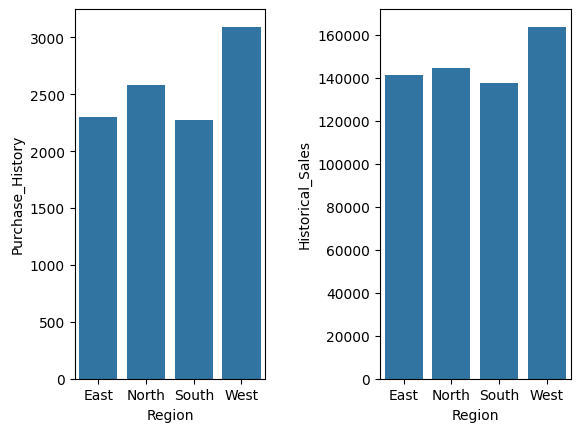

In [2755]:
plt.subplot(1 , 2, 1)
sns.barplot(data =  region_purchase_history_sum , x = 'Region' , y='Purchase_History')
plt.subplot(1,2,2)
plt.subplots_adjust(wspace=0.6)
sns.barplot(data =  sum_sales_region , x = 'Region' , y='Historical_Sales')

In [2756]:
#We can clearly see the quanity and sales made according to region
#West had most number of sales so was the quantity followed by North
#East and South had almost same quantity sold  , so was the sales .


In [2757]:
puchase_hist_seas_mark =df.groupby(['Seasonality_Trend','Market_Trend'])['Purchase_History'].sum().reset_index()
puchase_hist_seas_mark

,Seasonality_Trend,Market_Trend,Purchase_History
0,High,Downward,1009.0
1,High,Stable,1255.0
2,High,Upward,1461.0
3,Low,Downward,969.0
4,Low,Stable,1174.0
5,Low,Upward,1119.0
6,Medium,Downward,1038.0
7,Medium,Stable,1067.0
8,Medium,Upward,1159.0


<Axes: xlabel='Market_Trend', ylabel='Historical_Sales'>

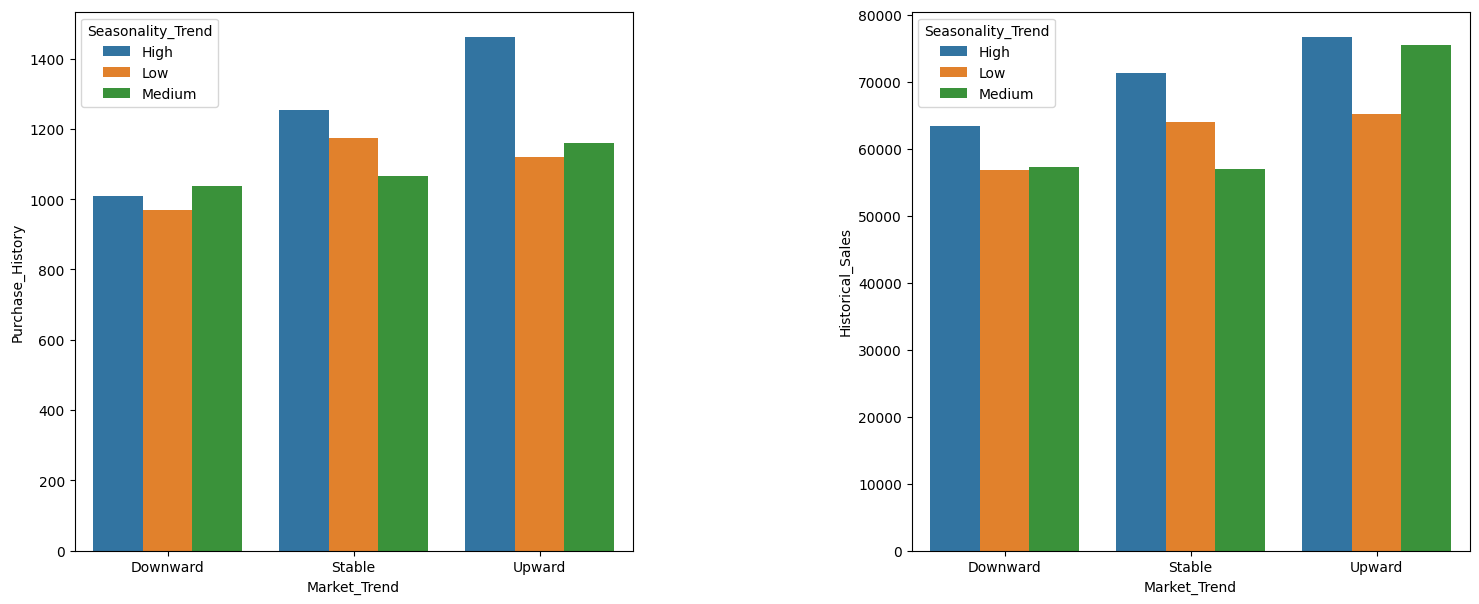

In [2758]:
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)

sns.barplot(data= puchase_hist_seas_mark , x= 'Market_Trend' , y = 'Purchase_History' , hue = 'Seasonality_Trend')
plt.subplot(1,2,2)
plt.subplots_adjust(wspace = 0.5)
sns.barplot(data = comb_sales , x = 'Market_Trend' , y = 'Historical_Sales' , hue = 'Seasonality_Trend')

In [2759]:
#From above graph we can see  when seasonality was high and market trend was downward , purchases were high.
#In low seasonality trend sales were high when market trend was stable , while in Upward trend sales were higher when Seasonality Trend was stable.



In [2760]:
puchase_hist_seas_mark_reg =df.groupby(['Seasonality_Trend','Market_Trend','Region'])['Purchase_History'].sum().reset_index()

In [2761]:
puchase_hist_seas_mark_reg

,Seasonality_Trend,Market_Trend,Region,Purchase_History
0,High,Downward,East,344.0
1,High,Downward,North,316.0
2,High,Downward,South,90.0
3,High,Downward,West,259.0
4,High,Stable,East,245.0
5,High,Stable,North,257.0
6,High,Stable,South,345.0
7,High,Stable,West,408.0
8,High,Upward,East,262.0
9,High,Upward,North,439.0


In [2762]:
df['Historical_Sales'].cov(df['Browsing_Time'])

np.float64(26.499462201791253)

In [2763]:
df['Historical_Sales'].corr(df['Browsing_Time'])

C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


np.float64(0.026652295530448625)

In [2764]:
df

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost,Browsing_Bucket
0,202.0,Medium,Downward,West,Premium,3.0,5.887003,415.0,22.417324,9.0,24.797399,10.257550,74.567648,5.681654,4489.273360,53.669712,6.0,19.881625,6-8
1,535.0,Medium,Upward,North,Premium,16.0,2.696263,275.0,24.461943,6.0,16.442579,104.446969,51.199887,4.938440,855.706431,39.152220,1.0,5.673110,3-5
2,960.0,Low,Upward,East,Premium,2.0,3.569956,382.0,10.887435,2.0,56.124183,153.033709,67.276455,9.493574,1593.059872,51.599110,8.0,7.477158,3-5
3,370.0,Low,Downward,West,Mid-Range,10.0,2.942847,152.0,3.915084,9.0,25.315337,166.421044,33.670591,3.421855,644.792531,26.641372,8.0,17.692711,3-5
4,206.0,Low,Downward,South,Premium,6.0,0.503714,155.0,28.671591,17.0,64.438712,177.085429,49.413318,5.400184,3501.084055,19.238732,9.0,36.029443,0-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,863.0,Medium,Upward,East,Premium,9.0,3.281534,260.0,5.709189,1.0,38.038212,39.126270,21.072412,7.613231,2466.500882,17.804137,5.0,13.719596,3-5
990,837.0,Medium,Stable,West,Premium,12.0,4.587751,172.0,25.915936,10.0,65.288606,183.802848,40.083361,4.938440,1407.612115,48.871787,9.0,18.659341,3-5
991,905.0,Medium,Downward,West,Premium,10.0,6.520644,296.0,29.367390,8.0,9.308862,22.236972,31.032394,1.595801,2263.455802,36.592011,3.0,32.942574,6-8
992,405.0,High,Downward,East,Mid-Range,1.0,4.640367,131.0,8.710534,3.0,28.842383,20.457165,60.808571,7.036975,3559.784071,28.310248,4.0,24.172535,3-5


Covarience is 27 whhile corelation is 0.02 which means   relation is positive , but relationship is very weak so we can say that sales does not have a influential dependency on browsing time.


<Figure size 200x400 with 0 Axes>

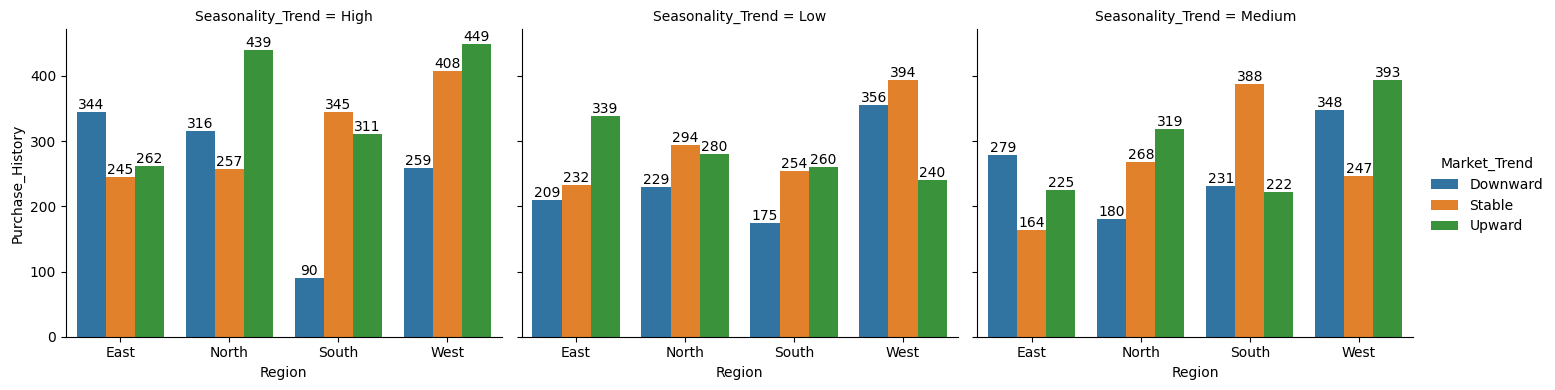

In [2765]:

plt.figure(figsize = (2,4))
ax =sns.catplot(puchase_hist_seas_mark_reg , x='Region' , y = 'Purchase_History' , hue = 'Market_Trend' , col = 'Seasonality_Trend', kind='bar' , height = 4,aspect = 1.2)
for ax_single in ax.axes.flat:
    for container in ax_single.containers:
        ax_single.bar_label(container)

plt.show()

In [2766]:
#seasonality trend>High
#In east when market trend was downward , the purchase were the highest, followed by upward and lower
#In north when when market trend was upward , purchases were the highest , followed by  downward and stable.
#In south when ,market trend was stable , purchases were highest ,  followed by upward and downward.
# In west purchases were almost same for stable nd upward trend , followed by downward.
#Seasonality Trend >>Low
#In east , when market trend was upward the purchase history was max followed by stable and downnward market trend.
#In north , purchases were higher for stable trend , followed by upward and downward.
#In south , purchase history was max for stable while for upward purchase history was near to stable , nd downward it was the lowest.
#In west it was highest for stable , followed by downward then upward.
#Seasonality trend >>Medium
#In east downward had the most purchases , followed by upward and downward
#In north upward had the most purchases followed by stable nd downward
#In south buys were most for stable , and same for upward and downward.
#In Medium purchases were most for upward ,followed by downward and stable.

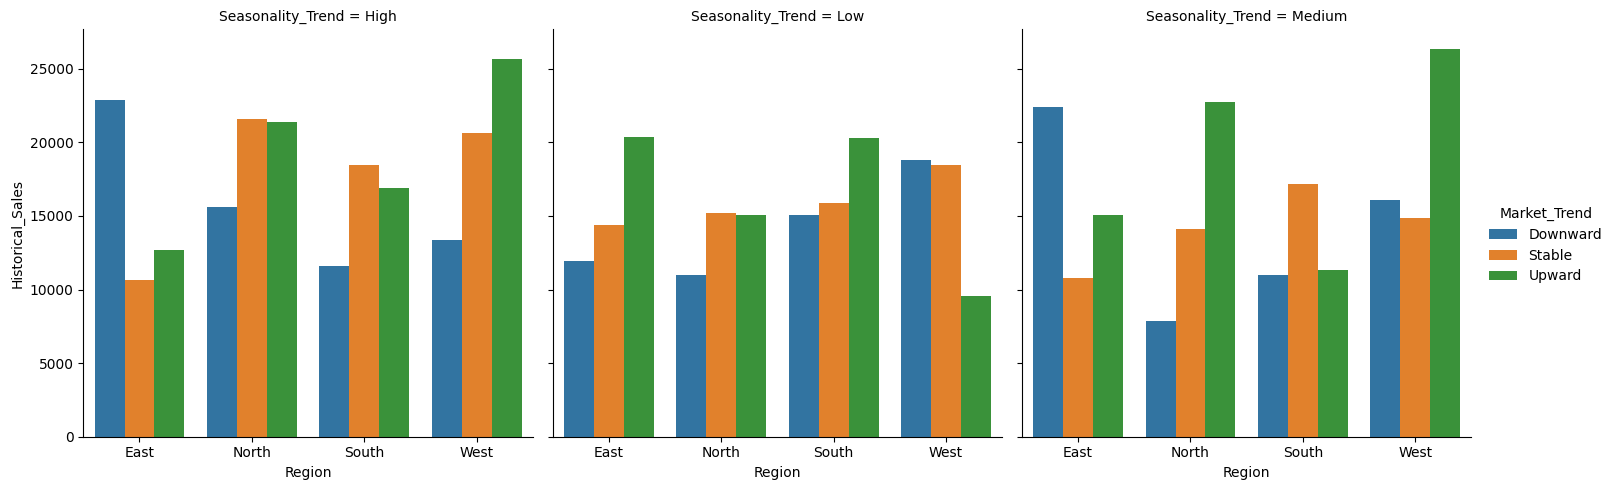

In [2767]:

 sns.catplot(data = region_market_trend_sales_ses , x = 'Region' , y = 'Historical_Sales' , hue = 'Market_Trend',col = 'Seasonality_Trend' ,kind= 'bar')

#Seasonality trend high
>#In  east , downward trended products made most out of sale , followed by upward and stable.
#In north , stable was the top , followed by upward and downward.
#In south , stable trend made most of sales followed by upward and downward.
#In west upward trend made the highest sales , followed by stable and downward.

#Seasonality trend low
> #In east  upward trend had made most of sales followed by stable and downward.
>#In north , sales were almost same for stable and upward trended products , while downward was lowest
>#In south  , upward was highest followed by upward and downward.
#In  west , downward was highest followed by stable and upward.


#Seasonality trend medium
#In east  , downnward had the most sales followed by upward then stable.
#In north , upward had the most sales followed by stable and downward.
#In south , stable had the most sales followed by upward then downward.
#In west , upward had the most sales followed by stable whichh was almost equal to downward

In [2769]:
Browsing_Bucket_Bin = df.groupby('Browsing_Bucket')['Browsing_Bucket'].count()
Browsing_Bucket_Bin.name = 'Browsing_Bin_Count'


In [2770]:
Browsing_Bin_Count = Browsing_Bucket_Bin.reset_index()

In [2771]:
Browsing_Bin_Count

,Browsing_Bucket,Browsing_Bin_Count
0,0-2,48
1,3-5,426
2,6-8,451
3,9-11,69


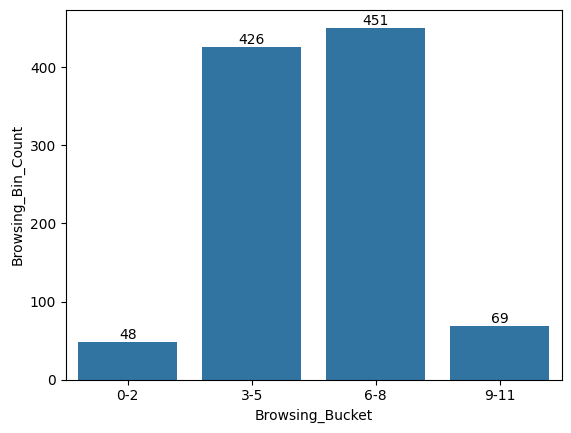

In [2772]:
ax =sns.barplot(data = Browsing_Bin_Count , x = 'Browsing_Bucket' , y = 'Browsing_Bin_Count')
for x in ax.containers:
    ax.bar_label(x)

48 times  , the items had a search time with 0 - 2 seconds.
426 times , the items had a search time with 3-5 seconds(it was the max - most of products were bought within this search time)
409 times , the items had a search time of 6-8 the second highest
69 times , the search was 9-11.

In [2773]:
sns.catplot(data = trends_browsing_count , x = 'Browsing_Bucket' , y = 'trends_browsing_count' , hue = 'Market_Trend' , col = 'Seasonality_Trend',kind = 'bar')

NameError: name 'trends_browsing_count' is not defined

In [2774]:
browsing_purchase_scenario = df.groupby('Browsing_Bucket')['Purchase_History'].sum().reset_index()

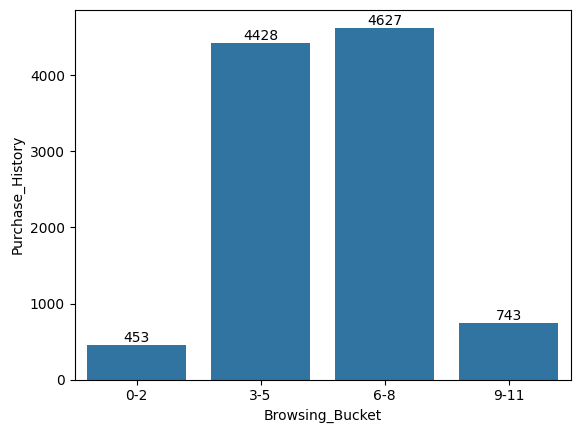

In [2775]:
ax = sns.barplot(data = browsing_purchase_scenario , x='Browsing_Bucket' , y = 'Purchase_History' )
for x in ax.containers:
    ax.bar_label(x)

In [2776]:
df.head()

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,Promotional_Discount,Competitor_Price,Bounce_Rate,Conversion_Rate,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost,Browsing_Bucket
0,202.0,Medium,Downward,West,Premium,3.0,5.887003,415.0,22.417324,9.0,24.797399,10.257550,74.567648,5.681654,4489.273360,53.669712,6.0,19.881625,6-8
1,535.0,Medium,Upward,North,Premium,16.0,2.696263,275.0,24.461943,6.0,16.442579,104.446969,51.199887,4.938440,855.706431,39.152220,1.0,5.673110,3-5
2,960.0,Low,Upward,East,Premium,2.0,3.569956,382.0,10.887435,2.0,56.124183,153.033709,67.276455,9.493574,1593.059872,51.599110,8.0,7.477158,3-5
3,370.0,Low,Downward,West,Mid-Range,10.0,2.942847,152.0,3.915084,9.0,25.315337,166.421044,33.670591,3.421855,644.792531,26.641372,8.0,17.692711,3-5
4,206.0,Low,Downward,South,Premium,6.0,0.503714,155.0,28.671591,17.0,64.438712,177.085429,49.413318,5.400184,3501.084055,19.238732,9.0,36.029443,0-2


In [2777]:
browsing_factors = df.groupby(['Seasonality_Trend' , 'Market_Trend' , 'Region' , 'Customer_Segment'])['Browsing_Bucket'].count().reset_index()

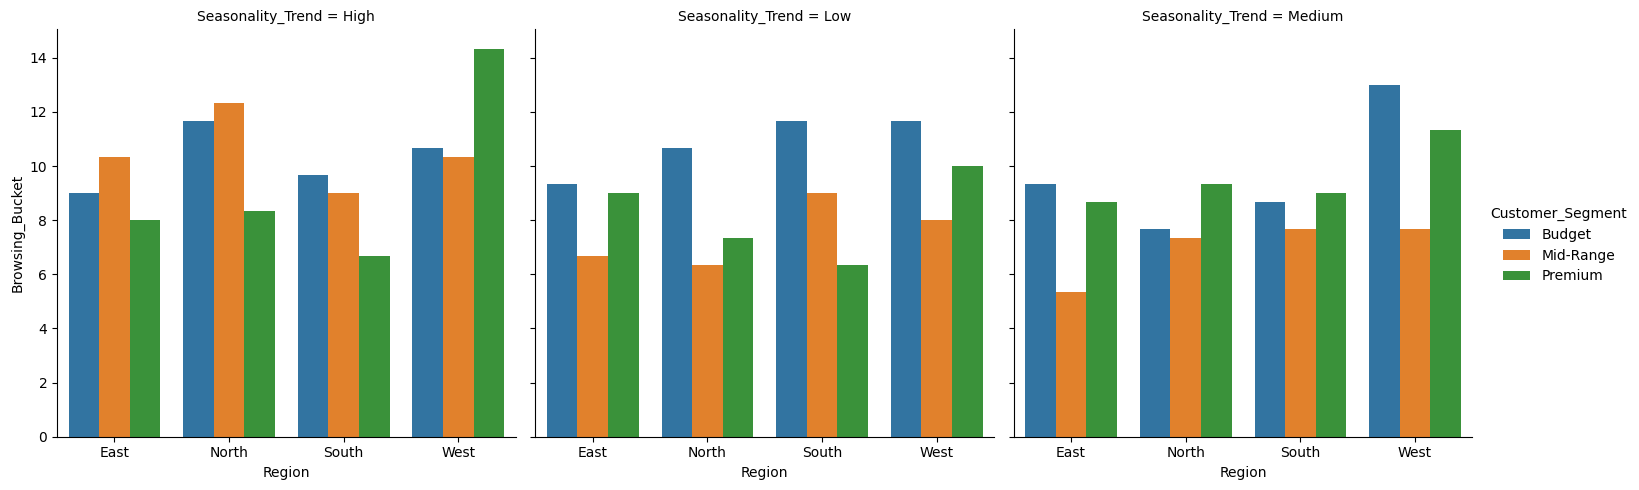

In [2778]:
sns.catplot(data = browsing_factors,x = 'Region' ,y = 'Browsing_Bucket' , hue = 'Customer_Segment' , col = 'Seasonality_Trend',kind = 'bar',errorbar=None)

Sesonality trend high
In east mid range products were browsed more led to premium and budget products.
In north also the same pattern was followed but browsing time was a bit more.
In south budget products were searched more compared to mid range products.
In west premium products were searched more , followed by budget and mid range.
Seasonality trend low
In East Budget products were browsed more time followed by premium andmid range.
In north budget product  were browsed for more time followed by premium and mid range.
In south budget were searched more , compared to mid range and premium.
In west budget were browsed more  , followe dby premium then mid range.
Seasonlity trend Medium
In east budget product were brosed more compared to premium and mid range.
In north premium were searched more , compared to budget then mid range.
In south premium then budget then mid range.
In west Budget then premium then mid range.


In [2779]:
browsing_purchase_scenario = df.groupby(['Browsing_Bucket','Region'] )['Purchase_History'].sum().reset_index()
browsing_purchase_scenario

,Browsing_Bucket,Region,Purchase_History
0,0-2,East,96.0
1,0-2,North,97.0
2,0-2,South,118.0
3,0-2,West,142.0
4,3-5,East,886.0
5,3-5,North,1327.0
6,3-5,South,931.0
7,3-5,West,1284.0
8,6-8,East,1111.0
9,6-8,North,1022.0


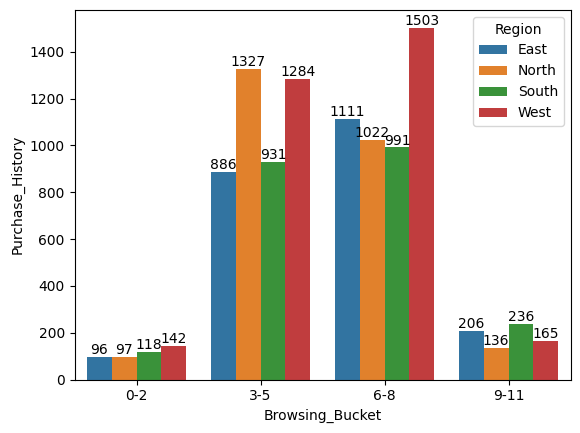

In [2780]:
ax =sns.barplot(data= browsing_purchase_scenario , x = 'Browsing_Bucket' , y = 'Purchase_History' , hue = 'Region')
for i in ax.containers:
    ax.bar_label(i)

In [2781]:
inventory_analysis=df.groupby(['Customer_Segment' , 'Region'])['Inventory_Level'].sum()
inventory_analysis

Customer_Segment  Region
Budget            East      20959.0
                  North     23832.0
                  South     22586.0
                  West      29515.0
Mid-Range         East      19108.0
                  North     20466.0
                  South     21176.0
                  West      20599.0
Premium           East      21744.0
                  North     18622.0
                  South     18856.0
                  West      29994.0
Name: Inventory_Level, dtype: float64

In [2782]:
df['Inventory_Level'].min()

np.float64(50.0)

In [2783]:
df['Inventory_Level'].mean()

np.float64(269.07142857142856)

In [2784]:
df['Inventory_Level'].max()

np.float64(498.0)

In [2785]:
def inventory_bucket(inventory):
    if inventory>=0 and inventory<=100:
        return '1-100'
    elif inventory>=101 and inventory<=200:
        return '101-200'
    elif inventory>=201 and inventory<=300:
        return '201-300'
    elif inventory>=301 and inventory<=400:
        return '301-400'
    else:
        return '400-500'
df['inventory_bucket'] = df['Inventory_Level'].apply(inventory_bucket)

In [2786]:
df.groupby('inventory_bucket')['inventory_bucket'].count()

inventory_bucket
1-100      119
101-200    218
201-300    249
301-400    201
400-500    207
Name: inventory_bucket, dtype: int64

In [2787]:
df.groupby('inventory_bucket')['Historical_Sales'].sum()

inventory_bucket
1-100       78878.0
101-200    113118.5
201-300    154556.5
301-400    124881.0
400-500    115698.0
Name: Historical_Sales, dtype: float64

In [2788]:
inventory_factors_reg =df.groupby( ['Region','Market_Trend','Seasonality_Trend'])['inventory_bucket'].count().reset_index()

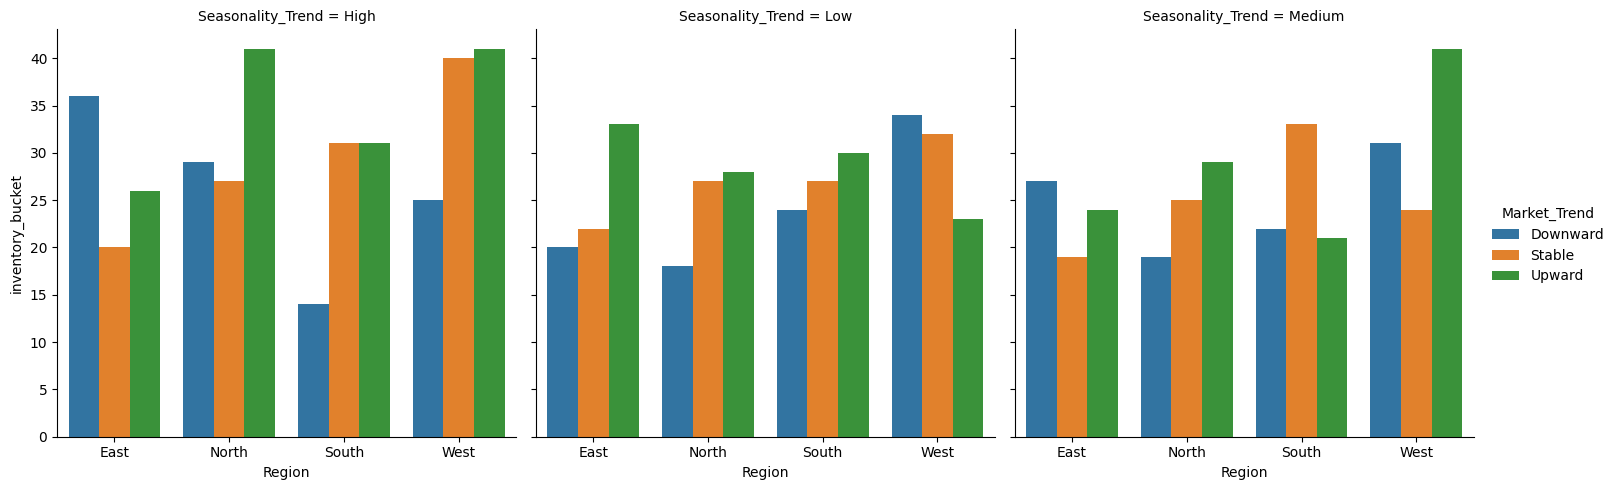

In [2789]:
sns.catplot(data = inventory_factors_reg , x = 'Region' , y ='inventory_bucket' ,hue = 'Market_Trend', col ='Seasonality_Trend',kind='bar' )

In [2790]:
inventory_factors_cust = df.groupby(['Seasonality_Trend' , 'Market_Trend' , 'Customer_Segment'])['inventory_bucket'].count().reset_index()
inventory_factors_cust

,Seasonality_Trend,Market_Trend,Customer_Segment,inventory_bucket
0,High,Downward,Budget,33
1,High,Downward,Mid-Range,37
2,High,Downward,Premium,34
3,High,Stable,Budget,44
4,High,Stable,Mid-Range,44
5,High,Stable,Premium,30
6,High,Upward,Budget,46
7,High,Upward,Mid-Range,45
8,High,Upward,Premium,48
9,Low,Downward,Budget,39


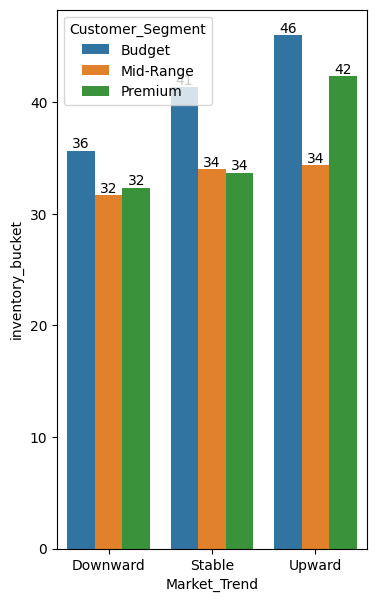

In [2791]:
plt.figure(figsize=(4,7))
ax =sns.barplot(data = inventory_factors_cust , x = 'Market_Trend' ,  y = 'inventory_bucket' ,hue = 'Customer_Segment',errorbar=None)
for x in ax.containers:
    ax.bar_label(x,fmt='%0.f')

In [2792]:
sales_cust_segment =df.groupby(['Customer_Segment' , 'Market_Trend'])['Historical_Sales'].sum().reset_index()

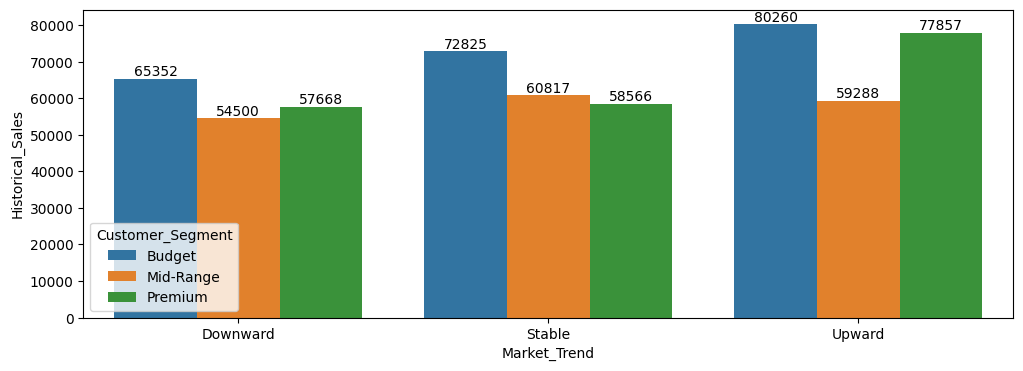

In [2793]:
plt.figure(figsize=(12,4))
ax =sns.barplot(data =sales_cust_segment, x = 'Market_Trend' , y = 'Historical_Sales' , hue = 'Customer_Segment')
for x in ax.containers:
    ax.bar_label(x,fmt='%0.f')

In [2794]:
df['Stock_Out_Rate']

0      22.417324
1      24.461943
2      10.887435
3       3.915084
4      28.671591
         ...    
989     5.709189
990    25.915936
991    29.367390
992     8.710534
993    48.144582
Name: Stock_Out_Rate, Length: 994, dtype: float64

In [2795]:
def sto_bucket(rate):
    if rate >= 0 and rate <= 10:
        return '0-10'
    elif rate >=11 and rate <=20:
        return '11-20'
    elif rate >=21 and rate <=30:
        return '21-30'
    elif rate >=31 and rate <=40:
        return '31-40'
    else:
        return '41-50'
df['Stock_Out_Rate_Bucket'] = df['Stock_Out_Rate'].apply(sto_bucket)

In [2796]:
df.groupby('Stock_Out_Rate_Bucket')['Stock_Out_Rate_Bucket'].count()

Stock_Out_Rate_Bucket
0-10     193
11-20    163
21-30    203
31-40    184
41-50    251
Name: Stock_Out_Rate_Bucket, dtype: int64

In [2797]:
df.groupby(['Seasonality_Trend' , 'Market_Trend'])['Stock_Out_Rate_Bucket'].count()

Seasonality_Trend  Market_Trend
High               Downward        104
                   Stable          118
                   Upward          139
Low                Downward         96
                   Stable          108
                   Upward          114
Medium             Downward         99
                   Stable          101
                   Upward          115
Name: Stock_Out_Rate_Bucket, dtype: int64

In [2798]:
stock_out_region =df.groupby(['Seasonality_Trend' , 'Market_Trend' , 'Region'])['Stock_Out_Rate_Bucket'].count().reset_index()


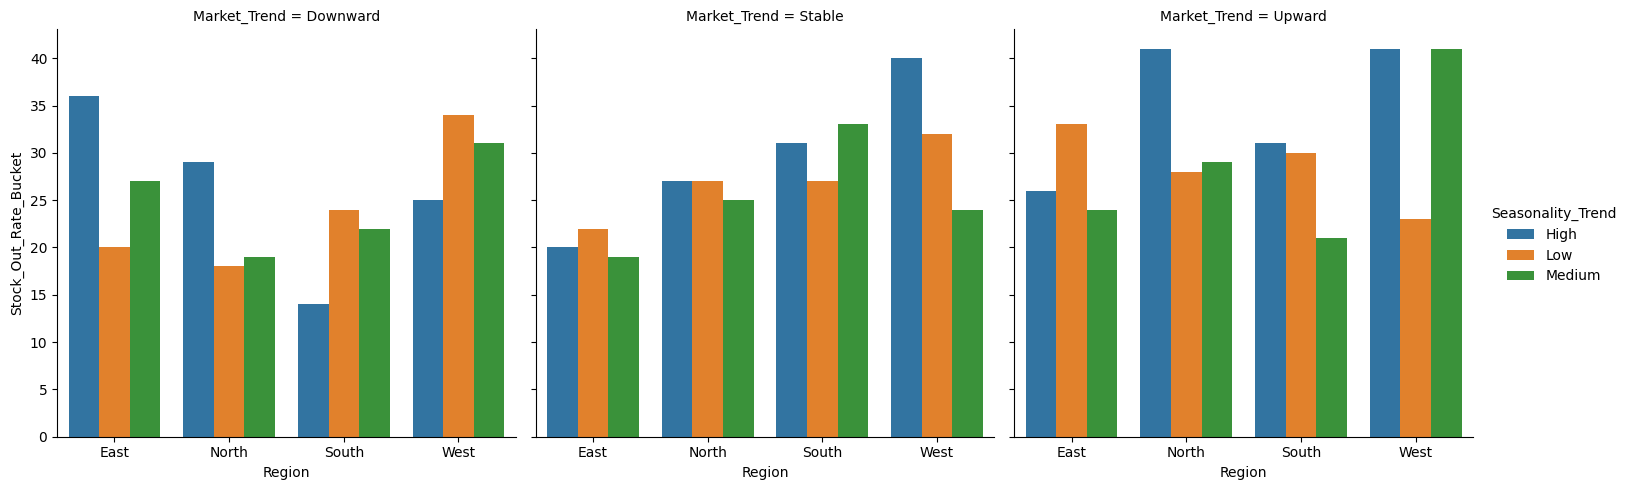

In [2799]:
sns.catplot(data = stock_out_region , x = 'Region' , y = 'Stock_Out_Rate_Bucket' , hue = 'Seasonality_Trend' , col =  'Market_Trend',kind='bar')


In [2800]:
df['Lead_Time'].max()

np.float64(19.0)

In [2801]:
def lead_t(days):
    if days >0 and days<=3:
        return '1-3'
    elif days >=4 and days <=6:
        return '4-6'
    elif days >= 7 and days <=9:
        return '7-9'
    elif days >= 10 and days<=12:
        return '10-12'
    elif days >=13 and days <=16:
        return '13-16'
    else:
        return '17-20'
df['lead_time_day'] = df['Lead_Time'].apply(lead_t)

In [2802]:
replenish_day = df.groupby(['Seasonality_Trend' ,'Market_Trend','lead_time_day'])['lead_time_day'].count()
replenish_day.name = 'Replenish_Day_Count'
Replenish_Day_Count = replenish_day.reset_index()

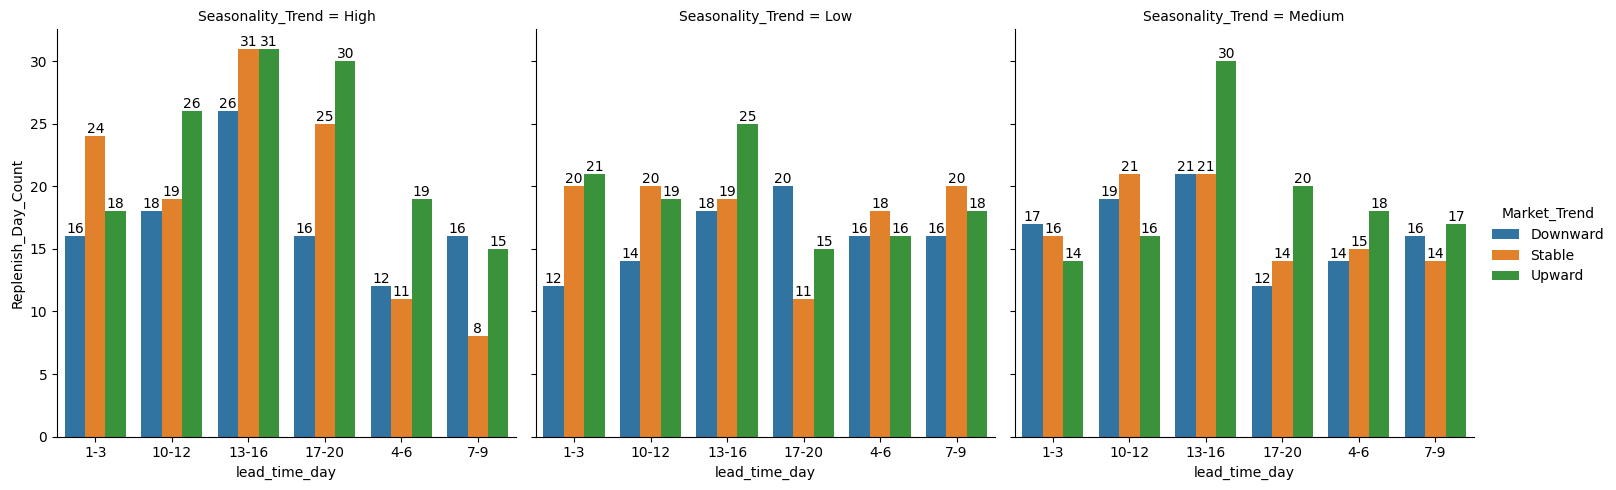

In [2803]:

ax = sns.catplot(data = Replenish_Day_Count , x = 'lead_time_day' ,  y = 'Replenish_Day_Count' , hue = 'Market_Trend' ,col = 'Seasonality_Trend',kind='bar')
for ax_single in ax.axes.flat:
    for container in ax_single.containers:
        ax_single.bar_label(container)

In [2804]:
customer_segment_replenish =df.groupby(['Customer_Segment','Seasonality_Trend','lead_time_day'])['lead_time_day'].count()


In [2805]:
customer_segment_replenish.name = 'Replenish_Day_Cust_Segment_Count'
Replenish_Day_Cust_Segment_Count = customer_segment_replenish.reset_index()
Replenish_Day_Cust_Segment_Count

,Customer_Segment,Seasonality_Trend,lead_time_day,Replenish_Day_Cust_Segment_Count
0,Budget,High,1-3,17
1,Budget,High,10-12,24
2,Budget,High,13-16,23
3,Budget,High,17-20,33
4,Budget,High,4-6,14
5,Budget,High,7-9,12
6,Budget,Low,1-3,23
7,Budget,Low,10-12,21
8,Budget,Low,13-16,29
9,Budget,Low,17-20,19


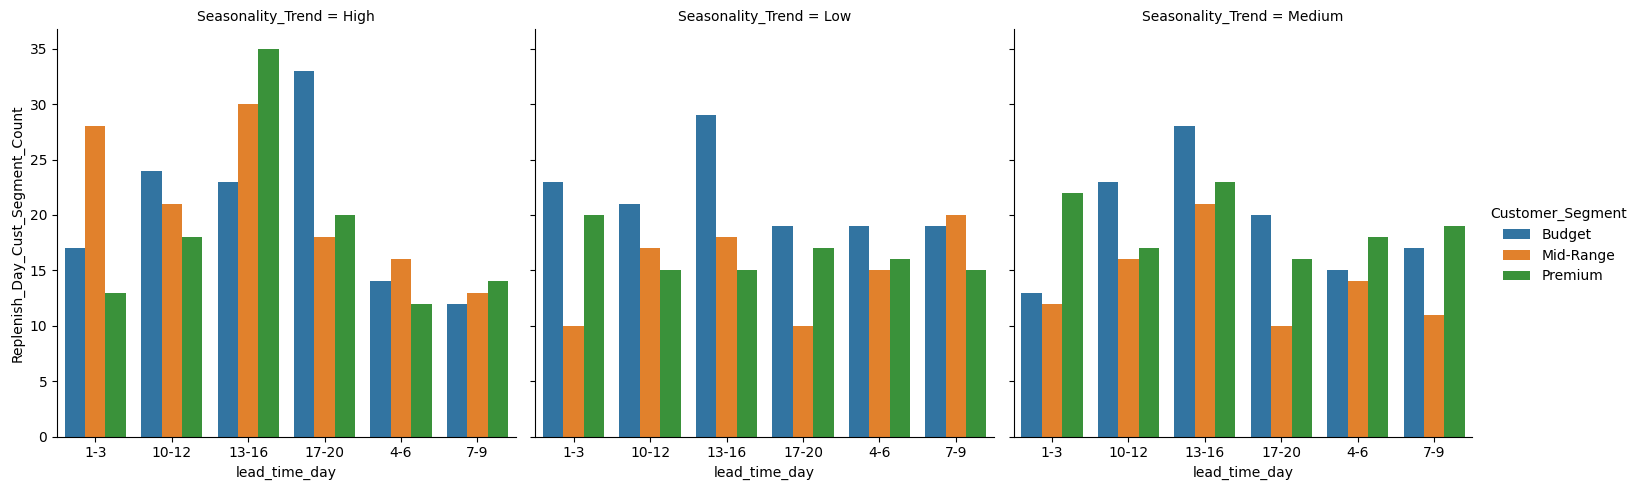

In [2806]:
sns.catplot(data = Replenish_Day_Cust_Segment_Count , x= 'lead_time_day' ,y= 'Replenish_Day_Cust_Segment_Count',hue='Customer_Segment',errorbar=None ,col = 'Seasonality_Trend', kind='bar')

In [2807]:
customer_segment_replenish_sales =df.groupby(['Customer_Segment','Seasonality_Trend','lead_time_day'])['Historical_Sales'].sum().reset_index()


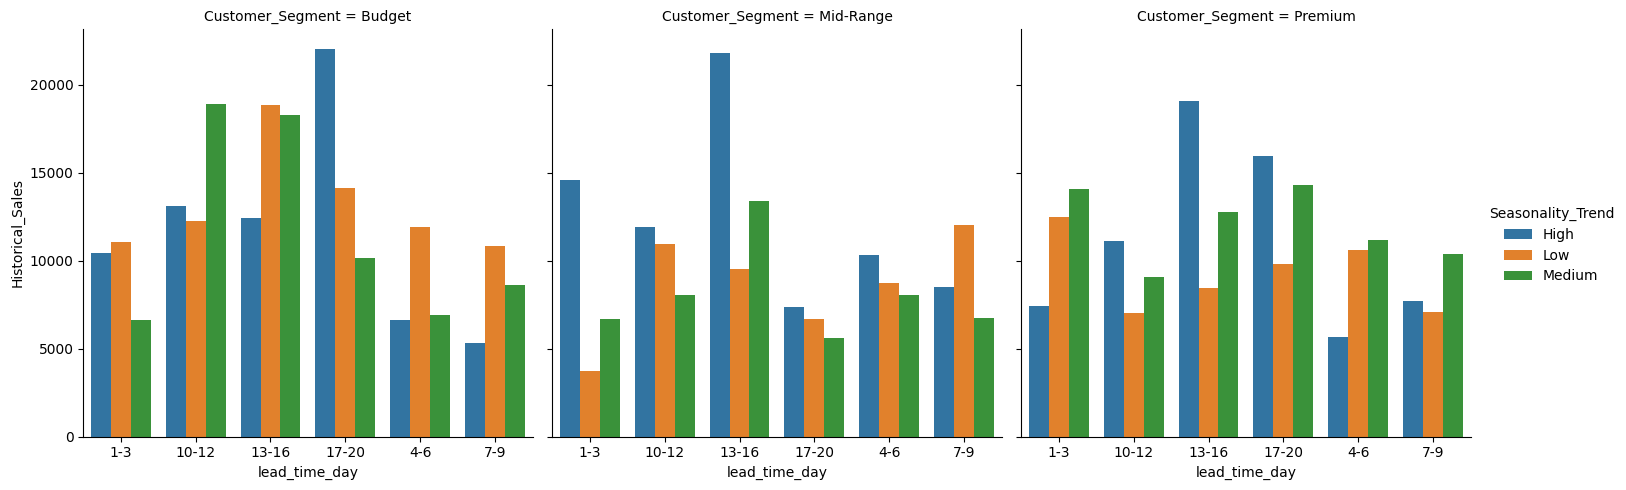

In [2808]:
sns.catplot(data=customer_segment_replenish_sales ,x= 'lead_time_day',y='Historical_Sales',hue='Seasonality_Trend',col='Customer_Segment',kind='bar')

In [2809]:
df['Bounce_Rate'].min()

np.float64(20.01111172)

In [2810]:

def Bounce_Rate_Bucket(bounce):
  if bounce >=1 and bounce <=20:
    return '1-20'
  elif bounce>20 and bounce<=40:
    return '21-40'
  elif bounce>40 and bounce<=60:
    return '41-60'
  else:
    return '61-80'
df['Bounce_Rate_Bin'] = df['Bounce_Rate'].apply(Bounce_Rate_Bucket)

In [2811]:
browsing_bounce_bucket = df.groupby(['Browsing_Bucket','Bounce_Rate_Bin'])['Bounce_Rate_Bin'].count()
browsing_bounce_bucket.name = 'browsing_bounce_comp'

browsing_bounce_comp = browsing_bounce_bucket.reset_index()

In [2812]:
bounce_count = df.groupby('Browsing_Bucket')['Bounce_Rate_Bin'].count().reset_index()
bounce_count

,Browsing_Bucket,Bounce_Rate_Bin
0,0-2,48
1,3-5,426
2,6-8,451
3,9-11,69


All up coming factors will depeend on this bin count onlt

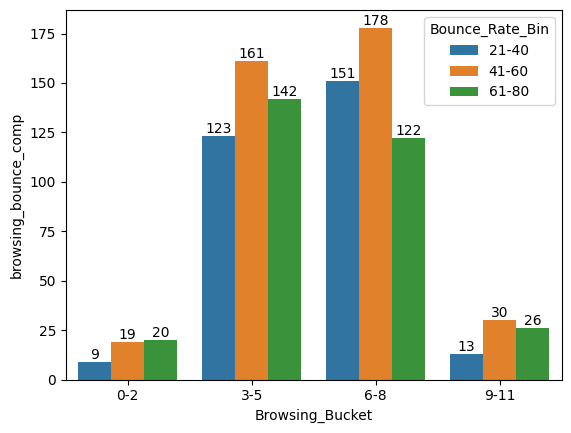

In [2813]:
ax =sns.barplot(data = browsing_bounce_comp , x ='Browsing_Bucket' , y = 'browsing_bounce_comp',hue='Bounce_Rate_Bin' )
for x in ax.containers:
  ax.bar_label(x)

For most of the products whose browsing time was 3-5 or 6-8 .....41-80% was their bounce rate.

In [2814]:
purchase_history_browsing_bounce =df.groupby('Bounce_Rate_Bin')['Purchase_History'].sum().reset_index()


In [2815]:
df.groupby('Bounce_Rate_Bin')['Purchase_History'].sum() ##doubt

Bounce_Rate_Bin
21-40    2928.0
41-60    4139.0
61-80    3184.0
Name: Purchase_History, dtype: float64

In [2816]:
df.groupby('Bounce_Rate_Bin')['Historical_Sales'].sum() ##DOUBT>>

Bounce_Rate_Bin
21-40    175829.5
41-60    228561.5
61-80    182741.0
Name: Historical_Sales, dtype: float64

In [2817]:

# Targeted Visitors:
# Visitors who stay are highly targeted and ready to purchase. The page may filter out casual visitors quickly, leaving only serious buyers who convert, leading to increased sales despite a high bounce rate.

# Direct or Returning Customers:
# Customers might know exactly what they want (e.g., returning visitors or direct search traffic). They quickly land on the product page, make the purchase, and leave, contributing to both high sales and high bounce rates.

# One-Page Checkout:
# If the website has a streamlined one-page checkout process or direct product purchase options, visitors may complete their transaction without navigating to other pages, resulting in a higher bounce rate.

# Irrelevant Traffic:
# High bounce rates might indicate irrelevant or unqualified traffic coming from ads or search engines. However, if even a small percentage of this traffic converts, sales could still increase.

# Seasonal or Viral Products:
# If a product is trending or viral, visitors may land directly on its page and purchase quickly, inflating sales while contributing to a high bounce rate.

In [2818]:

# 1. Traffic Quality:
# If traffic to your site is inconsistent (e.g., paid campaigns targeting varying audiences), it can cause fluctuations in sales.
# Action: Monitor traffic sources (organic, paid, direct, etc.) and identify which channels correlate with high sales.
# 2. Seasonality or Trends:
# Your product or category might be influenced by seasonal demand or trends (e.g., festive seasons, holidays, or viral products).
# Action: Analyze historical sales data to detect patterns and prepare for peak demand periods.
# 3. Inventory Issues:
# Sales can drop when certain products go out of stock or are backordered, reducing overall conversions.
# Action: Ensure adequate inventory for top-selling products and monitor stock levels closely.
# 4. Price Sensitivity:
# If competitors are adjusting prices or offering discounts, customers may switch to alternative options, affecting sales.
# Action: Regularly monitor competitor pricing and evaluate if price changes are impacting sales.
# 5. Website Performance:
# Slow load times, checkout errors, or poor mobile optimization can lead to abandoned carts and fluctuating sales.
# Action: Check for technical issues on your website using tools like Google PageSpeed Insights or user session recordings.
# 6. Marketing Campaigns:
# If sales spikes align with promotional campaigns or email marketing, the subsequent dip may be due to the campaign ending.
# Action: Plan campaigns strategically and analyze their short- and long-term impact on sales.
# 7. Customer Behavior:
# Impulse buying, product discovery, or reviews may cause sporadic increases in sales, while negative reviews or lack of engagement can cause decreases.
# Action: Regularly update content (reviews, descriptions, images) and encourage customer engagement.


In [2819]:

def conversion_bucket(rate):
  if rate>0 and rate<11:
    return '0-10'
  elif rate>=11 and rate<21:
    return '11-20'
  elif rate>=21 and rate<31:
    return '21-30'
  elif rate>=31 and rate<41:
    return '31-40'
  else:
    return '41-50'


df['Conversion_Bucket'] = df['Conversion_Rate'].apply(conversion_bucket)

In [2820]:
df.groupby('Conversion_Bucket')['Conversion_Bucket'].count()

Conversion_Bucket
0-10     988
11-20      4
21-30      1
31-40      1
Name: Conversion_Bucket, dtype: int64

In [2821]:
conversion_on_browsing =df.groupby(['Conversion_Bucket','Browsing_Bucket'])['Browsing_Bucket'].count()
conversion_on_browsing.name = 'Count'
Count = conversion_on_browsing.reset_index()
Count

conversion_bucket_trends = df.groupby(['Seasonality_Trend','Market_Trend'])['Conversion_Bucket'].count()

In [2822]:

conversion_bucket_trends = df.groupby(['Seasonality_Trend','Conversion_Bucket'])['Conversion_Bucket'].count()
conversion_bucket_trends

Seasonality_Trend  Conversion_Bucket
High               0-10                 359
                   11-20                  2
Low                0-10                 317
                   21-30                  1
Medium             0-10                 312
                   11-20                  2
                   31-40                  1
Name: Conversion_Bucket, dtype: int64

In [2823]:
conversion_bucket_trends_purchases = df.groupby(['Seasonality_Trend','Conversion_Bucket'])['Purchase_History'].sum().reset_index()
conversion_bucket_trends_purchases

,Seasonality_Trend,Conversion_Bucket,Purchase_History
0,High,0-10,3709.0
1,High,11-20,16.0
2,Low,0-10,3257.0
3,Low,21-30,5.0
4,Medium,0-10,3221.0
5,Medium,11-20,28.0
6,Medium,31-40,15.0


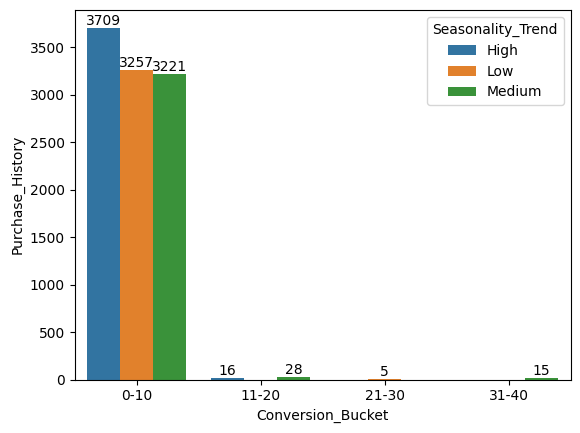

In [2824]:
ax =sns.barplot(data =  conversion_bucket_trends_purchases , x = 'Conversion_Bucket' , y = 'Purchase_History' , hue = 'Seasonality_Trend')
for i in ax.containers:
  ax.bar_label(i)

When seasonality trend was high and conversion bucket was 0-10 ,purchase was 3550 followed by low and medium trends.
When conversion bucket was around 11-20 only high and medium products were able to get converted with a purchase of 16 and 18 products.
When conversion was around 21-30 only low trended products were sold.
Conversion of 31-40 was for medium trended products, which sold around 15 products.

In [2825]:
Count

,Conversion_Bucket,Browsing_Bucket,Count
0,0-10,0-2,47
1,0-10,3-5,425
2,0-10,6-8,448
3,0-10,9-11,68
4,11-20,3-5,1
5,11-20,6-8,3
6,21-30,0-2,1
7,31-40,9-11,1


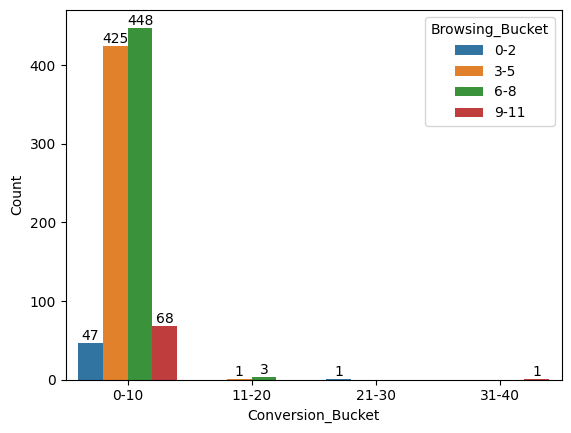

In [2826]:
ax =sns.barplot(data=Count , x='Conversion_Bucket' , y = 'Count' , hue = 'Browsing_Bucket')
for i in ax.containers:
  ax.bar_label(i)

Examples of Conversion Rate Scenarios:
Conversion Rate 0-10: High Traffic, Low Conversion
Example: E-commerce Flash Sale (e.g., Amazon during sales).
Scenario: Large volume of casual visitors, first-time buyers, or window shoppers.
Details: Out of 10,000 visitors, only 500 make a purchase, leading to a 5% conversion rate.
Implication: High sales driven by volume of traffic, despite a low conversion rate.
Conversion Rate 31-40: Low Traffic, High Conversion
Example: Luxury Store (e.g., Rolex website).
Scenario: Smaller, niche audience of highly committed buyers.
Details: Out of 500 visitors, 150 make a purchase, resulting in a 30% conversion rate.
Implication: Sales driven by quality visitors, not volume.

In [2827]:
d =df['Conversion_Rate']>30
df[d]


,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,...,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost,Browsing_Bucket,inventory_bucket,Stock_Out_Rate_Bucket,lead_time_day,Bounce_Rate_Bin,Conversion_Bucket
62,7000.0,Medium,Upward,North,Budget,15.0,8.396186,77.0,39.325286,10.0,...,4725.064778,67.369575,1.0,32.064196,9-11,1-100,31-40,10-12,61-80,31-40


In [2828]:
df['Customer_Lifetime_Value']

0      4489.273360
1       855.706431
2      1593.059872
3       644.792531
4      3501.084055
          ...     
989    2466.500882
990    1407.612115
991    2263.455802
992    3559.784071
993    4278.493689
Name: Customer_Lifetime_Value, Length: 994, dtype: float64

In [2829]:
clv_mtrend =df.groupby(['Customer_Segment','Market_Trend'])['Customer_Lifetime_Value'].sum().reset_index()

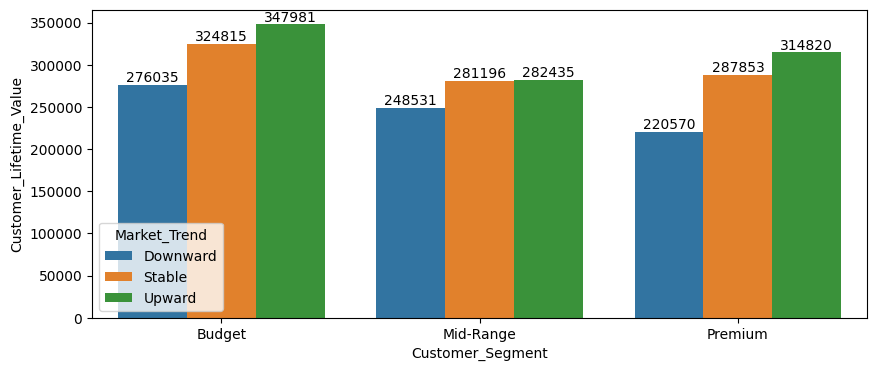

In [2830]:
plt.figure(figsize = (10 , 4))
ax = sns.barplot(data=clv_mtrend , x='Customer_Segment' , y = 'Customer_Lifetime_Value' , hue = 'Market_Trend')
for i in ax.containers:
  ax.bar_label(i)

In [2831]:
clv_strend =df.groupby(['Customer_Segment','Seasonality_Trend'])['Customer_Lifetime_Value'].sum().reset_index()

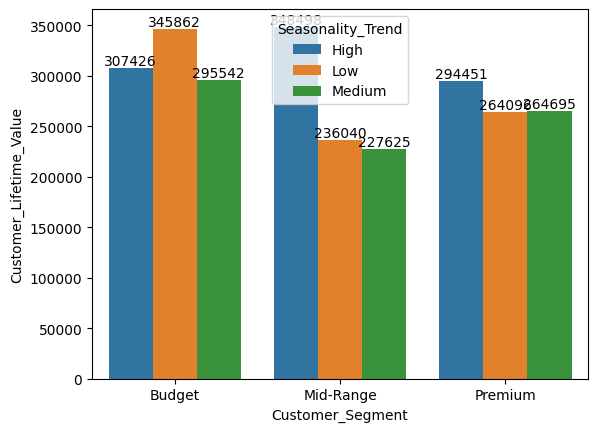

In [2832]:
ax =sns.barplot(data = clv_strend , x = 'Customer_Segment' , y = 'Customer_Lifetime_Value' , hue ='Seasonality_Trend' )
for i in ax.containers:
  ax.bar_label(i)

If we comapre seasonality trend ,
in budget products low trends had the highest clv followed by medium and high tredns almot same.
in mid range products high trended added most to clv , followed by low then medium.
in premium high trended the most , followed by budget and medium  which were almost near.

In [2833]:
margin_trend = df.groupby(['Region' ,'Seasonality_Trend' , 'Market_Trend'])['Gross_Margin'].sum().reset_index()

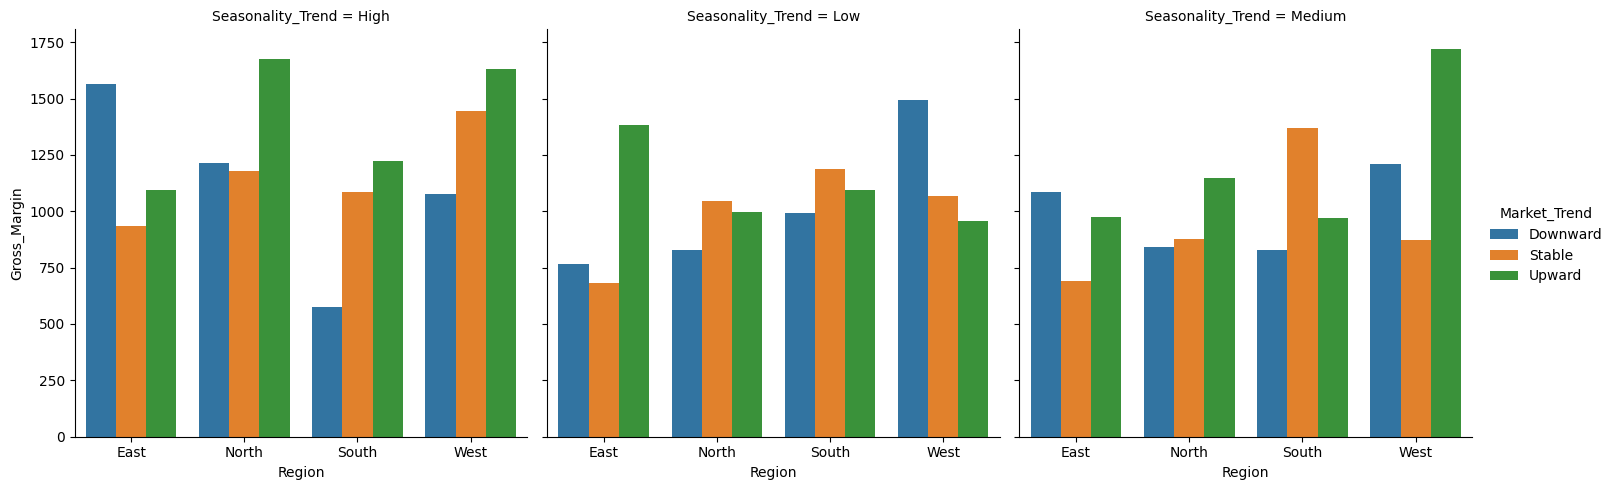

In [2834]:
sns.catplot(data =margin_trend ,x='Region', y = 'Gross_Margin' , hue = 'Market_Trend' , col = 'Seasonality_Trend' , kind='bar')

In [2835]:
df

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,...,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost,Browsing_Bucket,inventory_bucket,Stock_Out_Rate_Bucket,lead_time_day,Bounce_Rate_Bin,Conversion_Bucket
0,202.0,Medium,Downward,West,Premium,3.0,5.887003,415.0,22.417324,9.0,...,4489.273360,53.669712,6.0,19.881625,6-8,400-500,21-30,7-9,61-80,0-10
1,535.0,Medium,Upward,North,Premium,16.0,2.696263,275.0,24.461943,6.0,...,855.706431,39.152220,1.0,5.673110,3-5,201-300,21-30,4-6,41-60,0-10
2,960.0,Low,Upward,East,Premium,2.0,3.569956,382.0,10.887435,2.0,...,1593.059872,51.599110,8.0,7.477158,3-5,301-400,41-50,1-3,61-80,0-10
3,370.0,Low,Downward,West,Mid-Range,10.0,2.942847,152.0,3.915084,9.0,...,644.792531,26.641372,8.0,17.692711,3-5,101-200,0-10,7-9,21-40,0-10
4,206.0,Low,Downward,South,Premium,6.0,0.503714,155.0,28.671591,17.0,...,3501.084055,19.238732,9.0,36.029443,0-2,101-200,21-30,17-20,41-60,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,863.0,Medium,Upward,East,Premium,9.0,3.281534,260.0,5.709189,1.0,...,2466.500882,17.804137,5.0,13.719596,3-5,201-300,0-10,1-3,21-40,0-10
990,837.0,Medium,Stable,West,Premium,12.0,4.587751,172.0,25.915936,10.0,...,1407.612115,48.871787,9.0,18.659341,3-5,101-200,21-30,10-12,41-60,0-10
991,905.0,Medium,Downward,West,Premium,10.0,6.520644,296.0,29.367390,8.0,...,2263.455802,36.592011,3.0,32.942574,6-8,201-300,21-30,7-9,21-40,0-10
992,405.0,High,Downward,East,Mid-Range,1.0,4.640367,131.0,8.710534,3.0,...,3559.784071,28.310248,4.0,24.172535,3-5,101-200,0-10,1-3,61-80,0-10


In [2836]:
first_stock_out =df['Stock_Out_Rate']<=25
df[first_stock_out]
first_stock_out_sales = df[first_stock_out]['Historical_Sales']

first_stock_out_sales

0      202.0
1      535.0
2      960.0
3      370.0
5      171.0
       ...  
975    924.0
977    723.0
978    866.0
989    863.0
992    405.0
Name: Historical_Sales, Length: 503, dtype: float64

In [2837]:
next_stock_out =df['Stock_Out_Rate']>25
df[next_stock_out]
next_stock_out_sales = df[next_stock_out]['Historical_Sales']


Lets check Normality and Homogenity

In [2838]:
stat1, p1 = shapiro( df[first_stock_out]['Historical_Sales'])
stat2 , p2 = shapiro(df[next_stock_out]['Historical_Sales'] )

Null Hypothesis (H₀): There is no significant difference in sales based on the stock-out rate.
Alternative Hypothesis (H₁): There is a significant difference in sales based on the stock-out rate.

In [2839]:
p1 , p2

(np.float64(1.4907274241434857e-34), np.float64(5.4621513729539045e-37))

Not normal

In [2840]:
stat , p = levene(first_stock_out_sales, next_stock_out_sales)
p

np.float64(0.1694925458642969)

Data is homoegenous


The values are significantly low , which means we need to have parametric test for it instead of t test , i.ie Mann Whitney U test

In [2841]:
stat, p = mannwhitneyu(first_stock_out_sales, next_stock_out_sales)

In [2842]:
p

np.float64(0.23305530536828944)

P value >0.05
We fail to reject the null hypothesis , which means their is no significant difference between the groups.


In [2843]:
#Lets check relationship between lead time and purchase history
df['Lead_Time'].cov(df['Historical_Sales'])


np.float64(163.96829922130976)

In [2844]:
df['Lead_Time'].corr(df['Historical_Sales'])


np.float64(0.05628080623256099)

No significant relationship


In [2845]:

df['Lead_Time'].corr(df['Gross_Margin'])

np.float64(0.05186334854720458)

In [2846]:
df['Inventory_Level'].corr(df['Gross_Margin'])

np.float64(0.03708100041781691)

In [2847]:
high_margin =df[df['Seasonality_Trend']=='High']['Gross_Margin']
high_margin

7      47.569140
9      52.721021
11     20.939196
15     66.247290
16     44.218283
         ...    
976    39.626535
978    62.081344
980    37.746610
992    28.310248
993    10.667653
Name: Gross_Margin, Length: 361, dtype: float64

In [2848]:
low_margin =df[df['Seasonality_Trend']=='Low']['Gross_Margin']
low_margin

2      51.599110
3      26.641372
4      19.238732
5      25.579409
10     17.492724
         ...    
982    22.087033
983     9.093923
984    71.648975
985    58.739742
987    14.028962
Name: Gross_Margin, Length: 318, dtype: float64

In [2849]:
medium_margin =df[df['Seasonality_Trend']=='Medium']['Gross_Margin']
medium_margin

0      53.669712
1      39.152220
6      43.917657
8      64.722651
13     63.952484
         ...    
986    56.517693
988    22.395353
989    17.804137
990    48.871787
991    36.592011
Name: Gross_Margin, Length: 315, dtype: float64

In [2850]:
#Lets check if data is normal
stat1 , p1 = shapiro(high_margin)
stat2 , p2 = shapiro(low_margin)
stat3, p3 = shapiro(medium_margin)

In [2851]:
print(stat1 , p1)
print(stat2 , p2)
print(stat2 , p3)



0.9815702080093114 0.00014238122566074843
0.9638375177411873 4.156148143192607e-07
0.9638375177411873 7.069454387705426e-05


In [2852]:
#Check homogeneous nature
stat , p = levene(high_margin ,low_margin , medium_margin)
p

np.float64(0.012175179355952024)

In [2853]:
#Three groups are normalised but homogenous .Still we cant proceed  with ANOVA test , so Kruskal Wallis test.
from scipy.stats import kruskal

In [2854]:
stat , p = kruskal(high_margin ,low_margin , medium_margin)

In [2855]:
p


np.float64(0.5334578369264734)

Since 0.9>0.05 so we fail to reject the null hypothesis. Gross Margin does not depend on seasonality

In [2856]:
margin_up = df[df['Market_Trend']=='Upward']['Gross_Margin']

In [2857]:
margin_stable = df[df['Market_Trend']=='Stable']['Gross_Margin']

In [2858]:
margin_down= df[df['Market_Trend']=='Downward']['Gross_Margin']

In [2859]:
#Lets check normality
stat1 , p1  = shapiro(margin_up )
stat2 , p2 = shapiro(margin_stable)
stat3 , p3 = shapiro(margin_down)

In [2860]:
print(p1 , p2 , p3)

5.0527577981176365e-06 2.69085656309088e-06 0.0008514174556021241


In [2861]:
stat , p = kruskal(margin_up ,margin_stable , margin_down)
p

np.float64(0.032475315219707174)

In [2862]:
stat , p = mannwhitneyu(margin_up,margin_stable)
p

np.float64(0.08141815478265266)

In [2863]:
stat , p = mannwhitneyu(margin_up,margin_down)
p

np.float64(0.3371359665715301)

In [2864]:
stat , p = mannwhitneyu(margin_stable,margin_down)
p

np.float64(0.010644278153769188)

In [2865]:
p<0.05
We reject the null hypothesis.
low market trend, the margins could be lower due to factors like reduced demand or increased competition.

SyntaxError: invalid syntax (1701757707.py, line 2)

In [2866]:
margin_stable.median()

np.float64(37.13439328)

In [2867]:
margin_down.median()

np.float64(41.13107914)

In [2868]:
plt.boxplot([margin_stable, margin_low], labels=["Margin Stable", "Margin Low"])

NameError: name 'margin_low' is not defined

In [2869]:
#Stable has less median which means , the stable market trend needs to be addressed.

In [2870]:
North_Margin = df[df['Region']=='North']['Gross_Margin']
South_Margin = df[df['Region']=='South']['Gross_Margin']
East_Margin = df[df['Region']=='East']['Gross_Margin']
West_Margin = df[df['Region']=='West']['Gross_Margin']

In [2871]:
#Lets do anova for them 


In [2872]:
#Normality
stat1 , p1 = shapiro(North_Margin)
stat2 , p2 = shapiro(South_Margin)
stat3 , p3 = shapiro(East_Margin)
stat4 , p4 = shapiro(West_Margin)


In [2873]:
print(stat1,p1)
print(stat2,p2)
print(stat3,p3)
print(stat4,p4)

0.9741004279603565 0.00020300032526347368
0.9707788129696682 9.841703016602471e-05
0.9762745616145255 0.0007291800186385744
0.974837407101698 5.3874537609302026e-05


In [2874]:
#These groups are not normal

In [2875]:
#Homogenous nature
stat , p = levene(North_Margin ,South_Margin ,West_Margin,East_Margin)
p


np.float64(0.5163711145629124)

In [2876]:
#Data is homogenous but not normal lets go for kruskal test


In [2877]:
stat , p = kruskal(North_Margin , South_Margin ,West_Margin ,East_Margin)
p

np.float64(0.9218925865908298)

p value >0.05 which means no significant difference between margins region wise

In [2878]:
df['Browsing_Time'].corr(df['Gross_Margin'])

np.float64(0.04954841196345457)

In [2879]:
df['Browsing_Bucket']

0      6-8
1      3-5
2      3-5
3      3-5
4      0-2
      ... 
989    3-5
990    3-5
991    6-8
992    3-5
993    6-8
Name: Browsing_Bucket, Length: 994, dtype: object

In [2880]:
df

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,...,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost,Browsing_Bucket,inventory_bucket,Stock_Out_Rate_Bucket,lead_time_day,Bounce_Rate_Bin,Conversion_Bucket
0,202.0,Medium,Downward,West,Premium,3.0,5.887003,415.0,22.417324,9.0,...,4489.273360,53.669712,6.0,19.881625,6-8,400-500,21-30,7-9,61-80,0-10
1,535.0,Medium,Upward,North,Premium,16.0,2.696263,275.0,24.461943,6.0,...,855.706431,39.152220,1.0,5.673110,3-5,201-300,21-30,4-6,41-60,0-10
2,960.0,Low,Upward,East,Premium,2.0,3.569956,382.0,10.887435,2.0,...,1593.059872,51.599110,8.0,7.477158,3-5,301-400,41-50,1-3,61-80,0-10
3,370.0,Low,Downward,West,Mid-Range,10.0,2.942847,152.0,3.915084,9.0,...,644.792531,26.641372,8.0,17.692711,3-5,101-200,0-10,7-9,21-40,0-10
4,206.0,Low,Downward,South,Premium,6.0,0.503714,155.0,28.671591,17.0,...,3501.084055,19.238732,9.0,36.029443,0-2,101-200,21-30,17-20,41-60,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,863.0,Medium,Upward,East,Premium,9.0,3.281534,260.0,5.709189,1.0,...,2466.500882,17.804137,5.0,13.719596,3-5,201-300,0-10,1-3,21-40,0-10
990,837.0,Medium,Stable,West,Premium,12.0,4.587751,172.0,25.915936,10.0,...,1407.612115,48.871787,9.0,18.659341,3-5,101-200,21-30,10-12,41-60,0-10
991,905.0,Medium,Downward,West,Premium,10.0,6.520644,296.0,29.367390,8.0,...,2263.455802,36.592011,3.0,32.942574,6-8,201-300,21-30,7-9,21-40,0-10
992,405.0,High,Downward,East,Mid-Range,1.0,4.640367,131.0,8.710534,3.0,...,3559.784071,28.310248,4.0,24.172535,3-5,101-200,0-10,1-3,61-80,0-10


In [2881]:
conversin_low = df[(df['Conversion_Rate']>=0) &(df['Conversion_Rate']<=10)]['Gross_Margin']
conversin_med = df[(df['Conversion_Rate']>=11) &(df['Conversion_Rate']<=20)]['Gross_Margin']
conversin_mid = df[(df['Conversion_Rate']>=20) &(df['Conversion_Rate']<=30)]['Gross_Margin']
conversin_high = df[(df['Conversion_Rate']>=31) &(df['Conversion_Rate']<=40)]['Gross_Margin']

In [2882]:
conversin_med

107    41.605283
455    33.749332
562    59.673474
960    59.910114
Name: Gross_Margin, dtype: float64

In [2883]:
stat1 , p1 = shapiro(conversin_low)
stat2 , p2 = shapiro(conversin_med)


In [2884]:
p1,p2

(np.float64(2.1014798020914022e-11), np.float64(0.21643753892987883))

In [2885]:
stat , p = levene(conversin_low , c)
p

NameError: name 'c' is not defined

In [2886]:
#Since we have two samples we will look onto non parametric t test

In [2887]:
stat , p =mannwhitneyu(conversin_low , conversin_low)

p
So no significant difference


In [2888]:
df

,Historical_Sales,Seasonality_Trend,Market_Trend,Region,Customer_Segment,Purchase_History,Browsing_Time,Inventory_Level,Stock_Out_Rate,Lead_Time,...,Customer_Lifetime_Value,Gross_Margin,Sustainability_Score,Shipping_Cost,Browsing_Bucket,inventory_bucket,Stock_Out_Rate_Bucket,lead_time_day,Bounce_Rate_Bin,Conversion_Bucket
0,202.0,Medium,Downward,West,Premium,3.0,5.887003,415.0,22.417324,9.0,...,4489.273360,53.669712,6.0,19.881625,6-8,400-500,21-30,7-9,61-80,0-10
1,535.0,Medium,Upward,North,Premium,16.0,2.696263,275.0,24.461943,6.0,...,855.706431,39.152220,1.0,5.673110,3-5,201-300,21-30,4-6,41-60,0-10
2,960.0,Low,Upward,East,Premium,2.0,3.569956,382.0,10.887435,2.0,...,1593.059872,51.599110,8.0,7.477158,3-5,301-400,41-50,1-3,61-80,0-10
3,370.0,Low,Downward,West,Mid-Range,10.0,2.942847,152.0,3.915084,9.0,...,644.792531,26.641372,8.0,17.692711,3-5,101-200,0-10,7-9,21-40,0-10
4,206.0,Low,Downward,South,Premium,6.0,0.503714,155.0,28.671591,17.0,...,3501.084055,19.238732,9.0,36.029443,0-2,101-200,21-30,17-20,41-60,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,863.0,Medium,Upward,East,Premium,9.0,3.281534,260.0,5.709189,1.0,...,2466.500882,17.804137,5.0,13.719596,3-5,201-300,0-10,1-3,21-40,0-10
990,837.0,Medium,Stable,West,Premium,12.0,4.587751,172.0,25.915936,10.0,...,1407.612115,48.871787,9.0,18.659341,3-5,101-200,21-30,10-12,41-60,0-10
991,905.0,Medium,Downward,West,Premium,10.0,6.520644,296.0,29.367390,8.0,...,2263.455802,36.592011,3.0,32.942574,6-8,201-300,21-30,7-9,21-40,0-10
992,405.0,High,Downward,East,Mid-Range,1.0,4.640367,131.0,8.710534,3.0,...,3559.784071,28.310248,4.0,24.172535,3-5,101-200,0-10,1-3,61-80,0-10


In [2889]:
profit_premium = df[df['Customer_Segment']=='Premium']['Gross_Margin']
profit_mid = df[df['Customer_Segment']=='Mid-Range']['Gross_Margin']
profit_budget = df[df['Customer_Segment']=='Budget']['Gross_Margin']


In [2890]:
stat1,p1 = shapiro(profit_premium)
stat2,p2 = shapiro(profit_mid)
stat3,p3 = shapiro(profit_budget)

In [2891]:
print(p1,p2,p3)

1.3082651332795943e-05 9.41755330982673e-06 1.3851542410262887e-05


In [2892]:
stat , p = kruskal(profit_premium , profit_mid , profit_budget)
p

np.float64(0.05605219231527056)

In [2893]:
#v